In [1]:
dataset1filepath = "/Users/adityagautam/Downloads/mini-project-1/datasets/train/train_emoticon.csv"

In [2]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [4]:
def fixDataframe(df):
    for i in range(0,13):
        df['f'+str(i+1)] = df['input_emoticon'].str.slice(i,i+1)
    df.drop('input_emoticon', axis=1, inplace=True)
    #df = df.reset_index(drop=False)
    #df = df.set_index('index')
    return df

In [5]:
dftrain = pd.read_csv("/Users/adityagautam/Downloads/mini-project-1/datasets/train/train_emoticon.csv")
dfvalid = pd.read_csv("/Users/adityagautam/Downloads/mini-project-1/datasets/valid/valid_emoticon.csv")
dftest = pd.read_csv("/Users/adityagautam/Downloads/mini-project-1/datasets/test/test_emoticon.csv")

In [6]:
dftrain = fixDataframe(dftrain)
dfvalid = fixDataframe(dfvalid)
dftest = fixDataframe(dftest)

dfvalid = dfvalid[[
     'f1',
     'f2',
     'f3',
     'f4',
     'f5',
     'f6',
     'f7',
     'f8',
     'f9',
     'f10',
     'f11',
     'f12',
     'f13',
     'label']]
dftrain = dftrain[[
     'f1',
     'f2',
     'f3',
     'f4',
     'f5',
     'f6',
     'f7',
     'f8',
     'f9',
     'f10',
     'f11',
     'f12',
     'f13',
     'label']]
dftrain

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,label
0,😛,🛐,😻,😑,😣,🙠,🙯,🚼,😒,🙼,😑,🙯,😣,0
1,🛐,😑,😪,😛,🚼,🙯,😣,🚅,😑,🙯,😹,😣,🙼,0
2,😛,🙯,😑,🚡,😣,🚼,🛐,🙲,😣,🙯,🛑,😑,🙼,0
3,😛,🚼,🛐,🙐,😣,🙯,😑,🙪,😑,🙼,🛆,😣,🙯,1
4,🛐,🚟,🚼,😛,🙋,😑,😣,🙯,😹,🙯,😑,😣,🙼,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7075,🙯,😺,😻,😑,😣,🛐,😛,🚼,🙼,🙯,😣,😑,🚠,1
7076,🛐,🚼,😅,🙯,😣,🙹,😛,😑,😑,🙼,😣,🚍,🙯,1
7077,🛜,😑,🙒,😛,😣,🙯,🛐,🚼,🙼,🙬,🙯,😣,😑,1
7078,😣,😑,😛,🛋,🛐,🙯,🚼,🚪,🙯,😑,🛀,😣,🙼,0


In [ ]:
00001543646427181596614280026242231322841596262614
00046415963695154364222626141104715962624761614284
00046418994221543620690159661426247612621596614284
00015966143365815436291942226246428461415962780262

/var/folders/12/kxf9_p7s785_t9bymwdx1wsc0000gn/T/ipykernel_34073/3387147187.py:27: UserWarning: Glyph 128623 (\N{DOWNWARDS ROCKET}) missing from current font.
  plt.tight_layout()
/var/folders/12/kxf9_p7s785_t9bymwdx1wsc0000gn/T/ipykernel_34073/3387147187.py:27: UserWarning: Glyph 128720 (\N{PLACE OF WORSHIP}) missing from current font.
  plt.tight_layout()
/var/folders/12/kxf9_p7s785_t9bymwdx1wsc0000gn/T/ipykernel_34073/3387147187.py:27: UserWarning: Glyph 128700 (\N{BABY SYMBOL}) missing from current font.
  plt.tight_layout()
/var/folders/12/kxf9_p7s785_t9bymwdx1wsc0000gn/T/ipykernel_34073/3387147187.py:27: UserWarning: Glyph 128636 (\N{VERY HEAVY SOLIDUS}) missing from current font.
  plt.tight_layout()
/var/folders/12/kxf9_p7s785_t9bymwdx1wsc0000gn/T/ipykernel_34073/3387147187.py:27: UserWarning: Glyph 128710 (\N{TRIANGLE WITH ROUNDED CORNERS}) missing from current font.
  plt.tight_layout()
/var/folders/12/kxf9_p7s785_t9bymwdx1wsc0000gn/T/ipykernel_34073/3387147187.py:27: UserWar

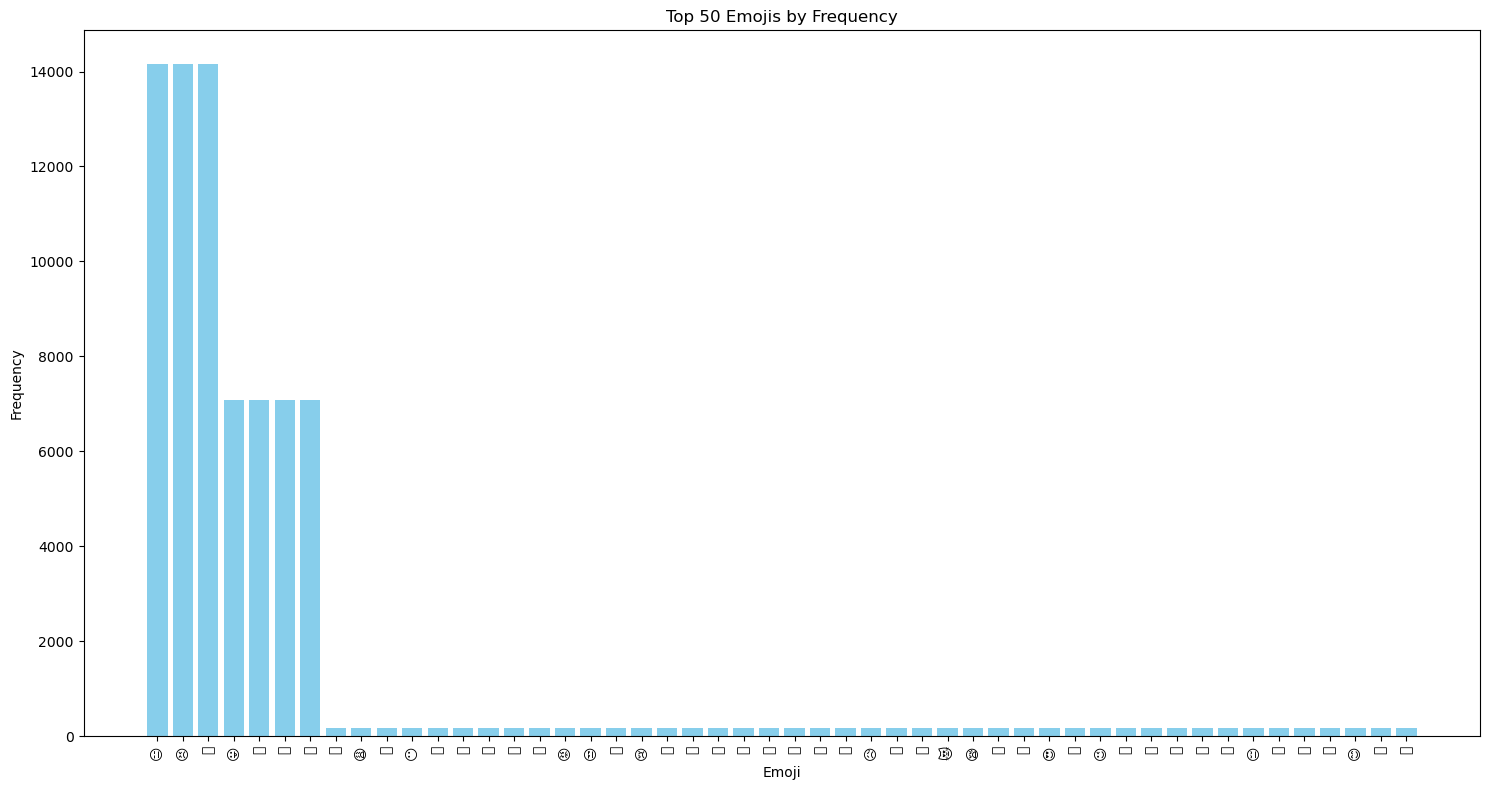

In [230]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Assuming dftrain is your dataset with columns f1 to f13

# Combine all emoji columns into a single list
emoji_columns = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13']
emoji_list = dftrain[emoji_columns].values.flatten()

# Count the frequency of each emoji
emoji_counts = Counter(emoji_list)

# Get the top 50 most common emojis
top_50_emojis = emoji_counts.most_common(50)

# Separate emojis and their frequencies for plotting
emojis, frequencies = zip(*top_50_emojis)

# Plot the top 50 emojis and their frequencies
plt.figure(figsize=(15, 8))
plt.bar(emojis, frequencies, color='skyblue')
plt.xlabel('Emoji')
plt.ylabel('Frequency')
plt.title('Top 50 Emojis by Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [113]:
import pandas as pd

# Assuming df is your pandas DataFrame
dftrain.to_csv('/Users/adityagautam/Desktop/CS771 Project/trainable_dataset.csv', index=False)  # Save to CSV file without the index

In [112]:
for i in range(1, 14):
    print(dftrain['f'+str(i)].unique().size)

213
213
213
213
213
213
213
213
91
91
91
91
91


In [95]:
import pandas as pd

# Assuming df is your DataFrame with emoji data
# Extract the unique emojis from column 'f1' and 'f11'
f1_emojis = set(dftrain['f1'].unique())
f11_emojis = set(dftrain['f11'].unique())

# Find the intersection (common emojis)
common_emojis = f1_emojis.intersection(f11_emojis)

# Display the common emojis
print("Emojis that occur in both f1 and f11:")
print(len(common_emojis))

Emojis that occur in both f1 and f11:
90


Training on 20% of the data - Validation Accuracy: 93.46%
Training on 40% of the data - Validation Accuracy: 95.30%
Training on 60% of the data - Validation Accuracy: 96.73%
Training on 80% of the data - Validation Accuracy: 98.16%
Training on 100% of the data - Validation Accuracy: 98.16%


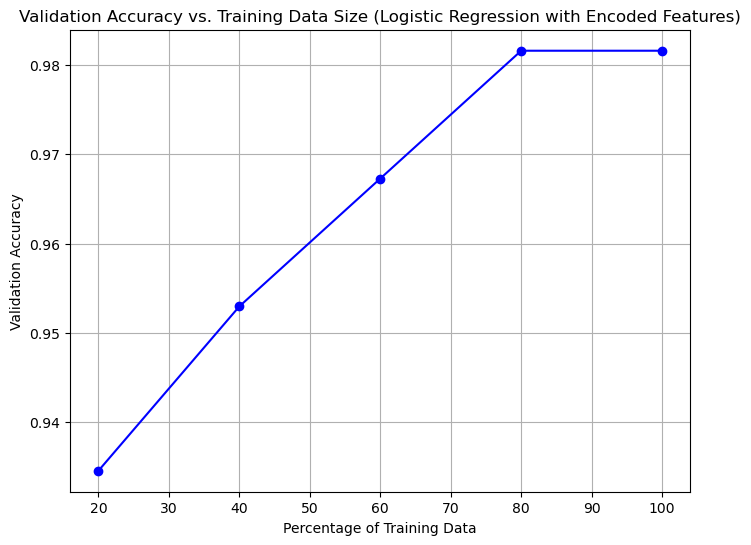

In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming dftrain and dfvalid are already defined
# Step 1: Define the unique set of emojis for f1 to f8 and f9 to f13
unique_emojis_f1_to_f8 = sorted(dftrain.iloc[:, :8].stack().unique())  # Assuming f1 to f8 are columns 0 to 7
unique_emojis_f9_to_f13 = sorted(dftrain.iloc[:, 8:13].stack().unique())  # Assuming f9 to f13 are columns 8 to 12

# Step 2: Create mappings of emojis to indices for one-hot encoding
emoji_to_index_f1_to_f8 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f1_to_f8)}
emoji_to_index_f9_to_f13 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f9_to_f13)}

# Function to encode a single row for f1 to f8 and f9 to f13
def encode_row(row, emoji_to_index, num_emojis):
    encoded = np.zeros(num_emojis, dtype=int)
    unique_emojis = pd.unique(row)
    for emoji in unique_emojis:
        if emoji in emoji_to_index:
            encoded[emoji_to_index[emoji]] = 1
    return encoded

# Step 3: Encode both dftrain and dfvalid
def encode_dataset(df, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13):
    X_f1_to_f8 = np.array([encode_row(row, emoji_to_index_f1_to_f8, 213) for _, row in df.iloc[:, :8].iterrows()])
    X_f9_to_f13 = np.array([encode_row(row, emoji_to_index_f9_to_f13, 91) for _, row in df.iloc[:, 8:13].iterrows()])
    return np.hstack([X_f1_to_f8, X_f9_to_f13])  # Combine the two encoded parts horizontally

# Encode training and validation sets
X_train_encoded = encode_dataset(dftrain, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)
X_valid_encoded = encode_dataset(dfvalid, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)

y_train = dftrain.iloc[:, -1]
y_valid = dfvalid.iloc[:, -1]

# Step 4: Train a logistic regression model and evaluate accuracy
percentages = [20, 40, 60, 80, 100]
accuracies = []

for pct in percentages:
    # Subset the training data
    sample_size = int((pct / 100) * len(dftrain))
    X_train_sample = X_train_encoded[:sample_size, :]
    y_train_sample = y_train[:sample_size]
    
    # Train logistic regression with L2 regularization
    model = LogisticRegression(penalty='l1',C = 20, solver='liblinear')
    model.fit(X_train_sample, y_train_sample)
    
    # Validate on the validation set
    y_valid_pred = model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy)
    
    print(f"Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Step 5: Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Training Data Size (Logistic Regression with Encoded Features)")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()

Training on 20% of the data - Validation Accuracy: 72.39%
Training on 40% of the data - Validation Accuracy: 81.60%
Training on 60% of the data - Validation Accuracy: 86.30%
Training on 80% of the data - Validation Accuracy: 90.80%
Training on 100% of the data - Validation Accuracy: 92.84%


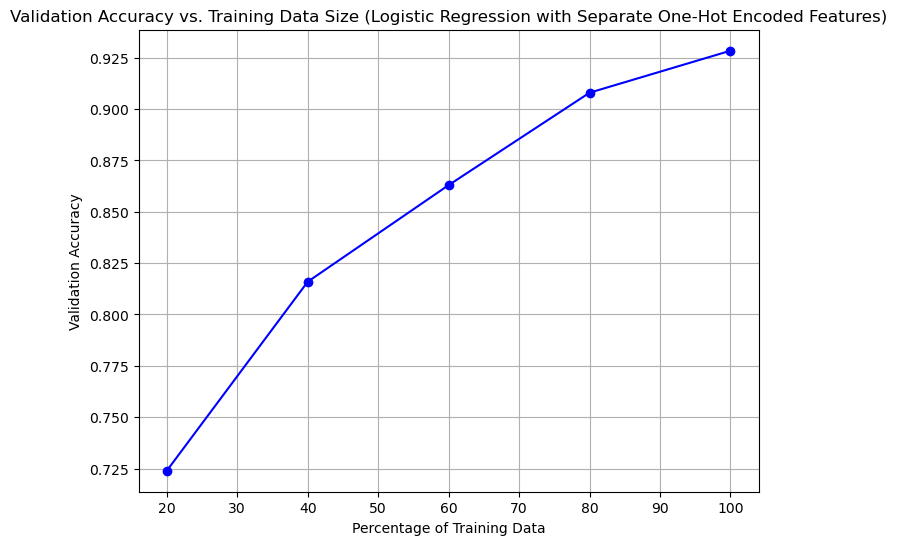

In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming dftrain and dfvalid are already defined

# Step 1: Define the unique set of emojis for f1 to f8 and f9 to f13
unique_emojis_f1_to_f8 = sorted(dftrain.iloc[:, :8].stack().unique())  # Assuming f1 to f8 are columns 0 to 7
unique_emojis_f9_to_f13 = sorted(dftrain.iloc[:, 8:13].stack().unique())  # Assuming f9 to f13 are columns 8 to 12

# Step 2: Create mappings of emojis to indices for one-hot encoding
emoji_to_index_f1_to_f8 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f1_to_f8)}
emoji_to_index_f9_to_f13 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f9_to_f13)}

# Function to encode emojis in separate one-hot vectors and concatenate them
def encode_row_separate_one_hot(row, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13, num_emojis_f1_to_f8, num_emojis_f9_to_f13):
    # Get unique emojis from the respective sections
    unique_emojis_f1_to_f8 = pd.unique(row[:8])
    unique_emojis_f9_to_f13 = pd.unique(row[8:13])
    
    # Initialize the one-hot encodings
    encoded_f1_to_f8 = np.zeros((len(unique_emojis_f1_to_f8), num_emojis_f1_to_f8), dtype=int)
    encoded_f9_to_f13 = np.zeros((len(unique_emojis_f9_to_f13), num_emojis_f9_to_f13), dtype=int)
    
    # Encode emojis from f1 to f8
    for i, emoji in enumerate(unique_emojis_f1_to_f8):
        if emoji in emoji_to_index_f1_to_f8:
            encoded_f1_to_f8[i, emoji_to_index_f1_to_f8[emoji]] = 1
    
    # Encode emojis from f9 to f13
    for i, emoji in enumerate(unique_emojis_f9_to_f13):
        if emoji in emoji_to_index_f9_to_f13:
            encoded_f9_to_f13[i, emoji_to_index_f9_to_f13[emoji]] = 1
    
    # Flatten and concatenate the one-hot vectors
    return np.concatenate([encoded_f1_to_f8.flatten(), encoded_f9_to_f13.flatten()])

# Step 3: Encode both dftrain and dfvalid
def encode_dataset_separate(df, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13, num_emojis_f1_to_f8, num_emojis_f9_to_f13):
    return np.array([encode_row_separate_one_hot(row, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13, num_emojis_f1_to_f8, num_emojis_f9_to_f13) 
                     for _, row in df.iterrows()])

# Encode training and validation sets
X_train_encoded = encode_dataset_separate(dftrain, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13, 213, 91)
X_valid_encoded = encode_dataset_separate(dfvalid, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13, 213, 91)

# Labels
y_train = dftrain.iloc[:, -1]
y_valid = dfvalid.iloc[:, -1]

# Step 4: Train a logistic regression model and evaluate accuracy
percentages = [20, 40, 60, 80, 100]
accuracies = []

for pct in percentages:
    # Subset the training data
    sample_size = int((pct / 100) * len(dftrain))
    X_train_sample = X_train_encoded[:sample_size, :]
    y_train_sample = y_train[:sample_size]
    
    # Train logistic regression with L1 regularization
    model = LogisticRegression(penalty='l1', C=20, solver='liblinear')
    model.fit(X_train_sample, y_train_sample)
    
    # Validate on the validation set
    y_valid_pred = model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy)
    
    print(f"Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Step 5: Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Training Data Size (Logistic Regression with Separate One-Hot Encoded Features)")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()

Combined Model - Validation Accuracy: 95.50%
Model f1 to f8 - Validation Accuracy: 74.44%
Model f9 to f13 - Validation Accuracy: 75.46%


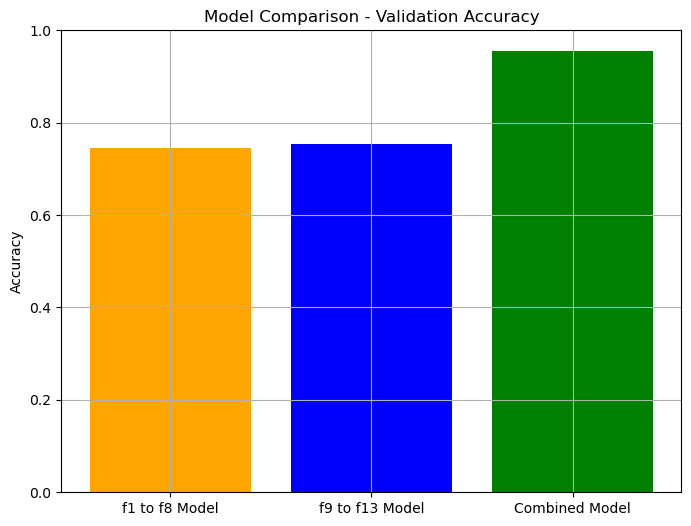

In [151]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming dftrain and dfvalid are already defined
# Step 1: Define the unique set of emojis for f1 to f8 and f9 to f13
unique_emojis_f1_to_f8 = sorted(dftrain.iloc[:, :8].stack().unique())  # Assuming f1 to f8 are columns 0 to 7
unique_emojis_f9_to_f13 = sorted(dftrain.iloc[:, 8:13].stack().unique())  # Assuming f9 to f13 are columns 8 to 12

# Step 2: Create mappings of emojis to indices for one-hot encoding
emoji_to_index_f1_to_f8 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f1_to_f8)}
emoji_to_index_f9_to_f13 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f9_to_f13)}

# Function to encode a single row for f1 to f8 and f9 to f13
def encode_row(row, emoji_to_index, num_emojis):
    encoded = np.zeros(num_emojis, dtype=int)
    unique_emojis = pd.unique(row)
    for emoji in unique_emojis:
        if emoji in emoji_to_index:
            encoded[emoji_to_index[emoji]] = 1
    return encoded

# Step 3: Encode dftrain and dfvalid separately for f1 to f8 and f9 to f13
def encode_dataset(df, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13):
    X_f1_to_f8 = np.array([encode_row(row, emoji_to_index_f1_to_f8, 213) for _, row in df.iloc[:, :8].iterrows()])
    X_f9_to_f13 = np.array([encode_row(row, emoji_to_index_f9_to_f13, 91) for _, row in df.iloc[:, 8:13].iterrows()])
    return X_f1_to_f8, X_f9_to_f13  # Separate encoded parts for f1 to f8 and f9 to f13

# Encode training and validation sets
X_train_f1_to_f8, X_train_f9_to_f13 = encode_dataset(dftrain, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)
X_valid_f1_to_f8, X_valid_f9_to_f13 = encode_dataset(dfvalid, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)

y_train = dftrain.iloc[:, -1]
y_valid = dfvalid.iloc[:, -1]

# Step 4: Train separate logistic regression models for f1 to f8 and f9 to f13
model_f1_to_f8 = LogisticRegression(penalty='l1', C=1, solver='liblinear')  # L1 regularization
model_f1_to_f8.fit(X_train_f1_to_f8, y_train)

model_f9_to_f13 = LogisticRegression(penalty='l2', C=1, solver='liblinear')  # L2 regularization
model_f9_to_f13.fit(X_train_f9_to_f13, y_train)

# Step 5: Combine predictions from both models
# Get the predicted probabilities for both models
y_valid_prob_f1_to_f8 = model_f1_to_f8.predict_proba(X_valid_f1_to_f8)[:, 1]  # Probabilities for class 1
y_valid_prob_f9_to_f13 = model_f9_to_f13.predict_proba(X_valid_f9_to_f13)[:, 1]

# Combine the probabilities by averaging
combined_prob = (y_valid_prob_f1_to_f8 + y_valid_prob_f9_to_f13) / 2

# Step 6: Make final predictions (threshold = 0.5)
y_valid_pred_combined = (combined_prob >= 0.5).astype(int)

# Step 7: Evaluate accuracy
valid_accuracy_combined = accuracy_score(y_valid, y_valid_pred_combined)
print(f"Combined Model - Validation Accuracy: {valid_accuracy_combined * 100:.2f}%")

# Optionally, compare with individual model accuracies
y_valid_pred_f1_to_f8 = model_f1_to_f8.predict(X_valid_f1_to_f8)
y_valid_pred_f9_to_f13 = model_f9_to_f13.predict(X_valid_f9_to_f13)

valid_accuracy_f1_to_f8 = accuracy_score(y_valid, y_valid_pred_f1_to_f8)
valid_accuracy_f9_to_f13 = accuracy_score(y_valid, y_valid_pred_f9_to_f13)

print(f"Model f1 to f8 - Validation Accuracy: {valid_accuracy_f1_to_f8 * 100:.2f}%")
print(f"Model f9 to f13 - Validation Accuracy: {valid_accuracy_f9_to_f13 * 100:.2f}%")

# Step 8: Plot the accuracy
accuracies = [valid_accuracy_f1_to_f8, valid_accuracy_f9_to_f13, valid_accuracy_combined]
labels = ['f1 to f8 Model', 'f9 to f13 Model', 'Combined Model']

plt.figure(figsize=(8, 6))
plt.bar(labels, accuracies, color=['orange', 'blue', 'green'])
plt.title("Model Comparison - Validation Accuracy")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

Training on 20% of the data:
  f1 to f8 Validation Accuracy: 73.21%
  f9 to f13 Validation Accuracy: 75.46%
  Combined Validation Accuracy: 87.93%
Training on 40% of the data:
  f1 to f8 Validation Accuracy: 74.44%
  f9 to f13 Validation Accuracy: 76.69%
  Combined Validation Accuracy: 92.64%
Training on 60% of the data:
  f1 to f8 Validation Accuracy: 74.23%
  f9 to f13 Validation Accuracy: 77.30%
  Combined Validation Accuracy: 93.25%
Training on 80% of the data:
  f1 to f8 Validation Accuracy: 75.05%
  f9 to f13 Validation Accuracy: 74.85%
  Combined Validation Accuracy: 94.48%
Training on 100% of the data:
  f1 to f8 Validation Accuracy: 74.44%
  f9 to f13 Validation Accuracy: 75.46%
  Combined Validation Accuracy: 95.50%


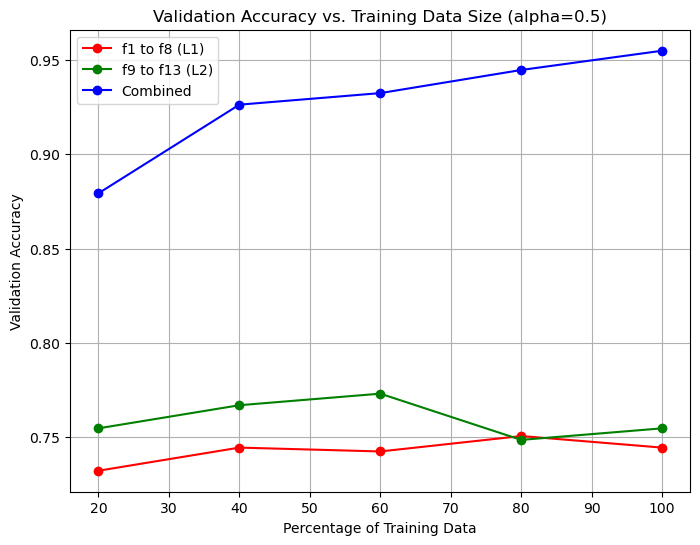

In [169]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming dftrain and dfvalid are already defined
# Step 1: Define the unique set of emojis for f1 to f8 and f9 to f13
unique_emojis_f1_to_f8 = sorted(dftrain.iloc[:, :8].stack().unique())  # Assuming f1 to f8 are columns 0 to 7
unique_emojis_f9_to_f13 = sorted(dftrain.iloc[:, 8:13].stack().unique())  # Assuming f9 to f13 are columns 8 to 12

# Step 2: Create mappings of emojis to indices for one-hot encoding
emoji_to_index_f1_to_f8 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f1_to_f8)}
emoji_to_index_f9_to_f13 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f9_to_f13)}

# Function to encode a single row for f1 to f8 and f9 to f13
def encode_row(row, emoji_to_index, num_emojis):
    encoded = np.zeros(num_emojis, dtype=int)
    unique_emojis = pd.unique(row)
    for emoji in unique_emojis:
        if emoji in emoji_to_index:
            encoded[emoji_to_index[emoji]] = 1
    return encoded

# Step 3: Encode dftrain and dfvalid separately for f1 to f8 and f9 to f13
def encode_dataset(df, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13):
    X_f1_to_f8 = np.array([encode_row(row, emoji_to_index_f1_to_f8, 213) for _, row in df.iloc[:, :8].iterrows()])
    X_f9_to_f13 = np.array([encode_row(row, emoji_to_index_f9_to_f13, 91) for _, row in df.iloc[:, 8:13].iterrows()])
    return X_f1_to_f8, X_f9_to_f13  # Separate encoded parts for f1 to f8 and f9 to f13

# Encode training and validation sets
X_train_f1_to_f8, X_train_f9_to_f13 = encode_dataset(dftrain, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)
X_valid_f1_to_f8, X_valid_f9_to_f13 = encode_dataset(dfvalid, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)

y_train = dftrain.iloc[:, -1]
y_valid = dfvalid.iloc[:, -1]

# Function to train separate models and compute combined accuracy
def train_and_evaluate(alpha, percentages):
    combined_accuracies = []
    f1_to_f8_accuracies = []
    f9_to_f13_accuracies = []
    
    for pct in percentages:
        # Subset the training data
        sample_size = int((pct / 100) * len(dftrain))
        X_train_f1_to_f8_sample = X_train_f1_to_f8[:sample_size, :]
        X_train_f9_to_f13_sample = X_train_f9_to_f13[:sample_size, :]
        y_train_sample = y_train[:sample_size]

        # Train logistic regression models
        model_f1_to_f8 = LogisticRegression(penalty='l1', C=1, solver='liblinear')  # L1 regularization
        model_f1_to_f8.fit(X_train_f1_to_f8_sample, y_train_sample)

        model_f9_to_f13 = LogisticRegression(penalty='l2', C=1, solver='liblinear')  # L2 regularization
        model_f9_to_f13.fit(X_train_f9_to_f13_sample, y_train_sample)

        # Get the predicted probabilities for both models
        y_valid_prob_f1_to_f8 = model_f1_to_f8.predict_proba(X_valid_f1_to_f8)[:, 1]
        y_valid_prob_f9_to_f13 = model_f9_to_f13.predict_proba(X_valid_f9_to_f13)[:, 1]

        # Individual predictions
        y_valid_pred_f1_to_f8 = (y_valid_prob_f1_to_f8 >= 0.5).astype(int)
        y_valid_pred_f9_to_f13 = (y_valid_prob_f9_to_f13 >= 0.5).astype(int)

        # Combine the probabilities using alpha
        combined_prob = alpha * y_valid_prob_f1_to_f8 + (1 - alpha) * y_valid_prob_f9_to_f13

        # Final combined prediction (threshold = 0.5)
        y_valid_pred_combined = (combined_prob >= 0.5).astype(int)

        # Calculate accuracy for individual models and combined
        valid_accuracy_f1_to_f8 = accuracy_score(y_valid, y_valid_pred_f1_to_f8)
        valid_accuracy_f9_to_f13 = accuracy_score(y_valid, y_valid_pred_f9_to_f13)
        valid_accuracy_combined = accuracy_score(y_valid, y_valid_pred_combined)

        f1_to_f8_accuracies.append(valid_accuracy_f1_to_f8)
        f9_to_f13_accuracies.append(valid_accuracy_f9_to_f13)
        combined_accuracies.append(valid_accuracy_combined)
        
        print(f"Training on {pct}% of the data:")
        print(f"  f1 to f8 Validation Accuracy: {valid_accuracy_f1_to_f8 * 100:.2f}%")
        print(f"  f9 to f13 Validation Accuracy: {valid_accuracy_f9_to_f13 * 100:.2f}%")
        print(f"  Combined Validation Accuracy: {valid_accuracy_combined * 100:.2f}%")
    
    return f1_to_f8_accuracies, f9_to_f13_accuracies, combined_accuracies

# Step 4: Define the percentages to evaluate and the alpha value
percentages = [20, 40, 60, 80, 100]
alpha = 0.5  # You can tune this value to change the relative importance of the sub-models

# Step 5: Train and evaluate the models for different percentages
f1_to_f8_accuracies, f9_to_f13_accuracies, combined_accuracies = train_and_evaluate(alpha, percentages)

# Step 6: Plot the individual and combined validation accuracies
plt.figure(figsize=(8, 6))
plt.plot(percentages, f1_to_f8_accuracies, marker='o', linestyle='-', color='r', label='f1 to f8 (L1)')
plt.plot(percentages, f9_to_f13_accuracies, marker='o', linestyle='-', color='g', label='f9 to f13 (L2)')
plt.plot(percentages, combined_accuracies, marker='o', linestyle='-', color='b', label='Combined')
plt.title(f"Validation Accuracy vs. Training Data Size (alpha={alpha})")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [129]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming dftrain and dfvalid are already defined
# Step 1: Define the unique set of emojis for f1 to f8 and f9 to f13
unique_emojis_f1_to_f8 = sorted(dftrain.iloc[:, :8].stack().unique())  # Assuming f1 to f8 are columns 0 to 7
unique_emojis_f9_to_f13 = sorted(dftrain.iloc[:, 8:13].stack().unique())  # Assuming f9 to f13 are columns 8 to 12

# Step 2: Create mappings of emojis to indices for one-hot encoding
emoji_to_index_f1_to_f8 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f1_to_f8)}
emoji_to_index_f9_to_f13 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f9_to_f13)}

# Function to encode a single row for f1 to f8 and f9 to f13
def encode_row(row, emoji_to_index, num_emojis):
    encoded = np.zeros(num_emojis, dtype=int)
    unique_emojis = pd.unique(row)
    for emoji in unique_emojis:
        if emoji in emoji_to_index:
            encoded[emoji_to_index[emoji]] = 1
    return encoded

# Step 3: Encode both dftrain and dfvalid
def encode_dataset(df, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13):
    X_f1_to_f8 = np.array([encode_row(row, emoji_to_index_f1_to_f8, 213) for _, row in df.iloc[:, :8].iterrows()])
    X_f9_to_f13 = np.array([encode_row(row, emoji_to_index_f9_to_f13, 91) for _, row in df.iloc[:, 8:13].iterrows()])
    return np.hstack([X_f1_to_f8, X_f9_to_f13])  # Combine the two encoded parts horizontally

# Encode training and validation sets
X_train_encoded = encode_dataset(dftrain, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)
X_valid_encoded = encode_dataset(dfvalid, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)

y_train = dftrain.iloc[:, -1]
y_valid = dfvalid.iloc[:, -1] 

# Step 4: Create DataFrames for encoded training and validation data with labels
def create_encoded_dataframe(X_encoded, y_labels):
    num_features = X_encoded.shape[1]
    column_names = [f'b{i + 1}' for i in range(num_features)]
    df_encoded = pd.DataFrame(X_encoded, columns=column_names)
    df_encoded['label'] = y_labels.values  # Add labels as a new column
    return df_encoded

# Create DataFrames
df_train_encoded = create_encoded_dataframe(X_train_encoded, y_train)
df_valid_encoded = create_encoded_dataframe(X_valid_encoded, y_valid)

# Step 5: Save the DataFrames to CSV
df_train_encoded.to_csv('/Users/adityagautam/Desktop/CS771 Project/encoded_train_data.csv', index=False)
df_valid_encoded.to_csv('/Users/adityagautam/Desktop/CS771 Project/encoded_valid_data.csv', index=False)

# Display the first few rows of the new DataFrames
print("Encoded Training DataFrame:")
print(df_train_encoded.head())
print("\nEncoded Validation DataFrame:")
print(df_valid_encoded.head())

Encoded Training DataFrame:
   b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  ...  b296  b297  b298  b299  b300  \
0   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0     0   
1   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0     0   
2   0   0   0   0   0   0   0   0   0    0  ...     0     1     0     0     0   
3   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0     0   
4   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0     0   

   b301  b302  b303  b304  label  
0     0     0     0     0      0  
1     0     0     0     0      0  
2     0     0     0     0      0  
3     0     0     0     0      1  
4     0     0     0     0      1  

[5 rows x 305 columns]

Encoded Validation DataFrame:
   b1  b2  b3  b4  b5  b6  b7  b8  b9  b10  ...  b296  b297  b298  b299  b300  \
0   0   0   0   0   0   0   0   0   0    0  ...     0     0     0     0     0   
1   0   0   0   0   0   0   0   0   0    0  ...     0     

Training on 20% of the data - Validation Accuracy: 93.46%
Training on 40% of the data - Validation Accuracy: 95.50%
Training on 60% of the data - Validation Accuracy: 96.93%
Training on 80% of the data - Validation Accuracy: 97.75%
Training on 100% of the data - Validation Accuracy: 98.36%


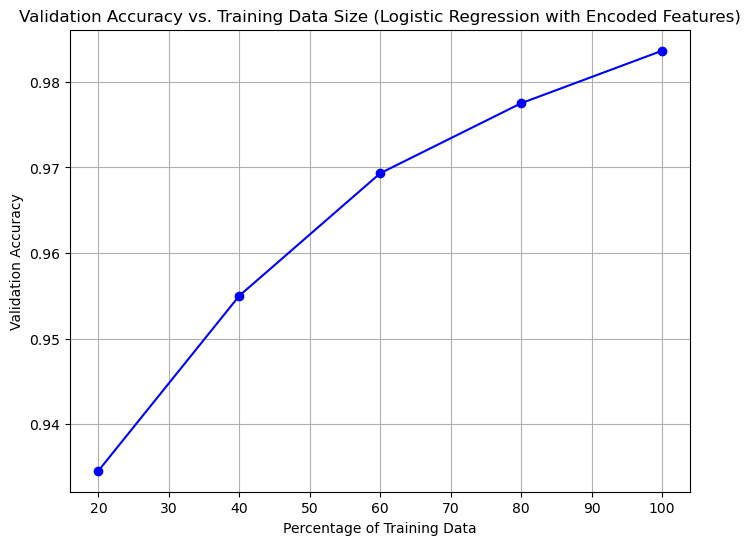

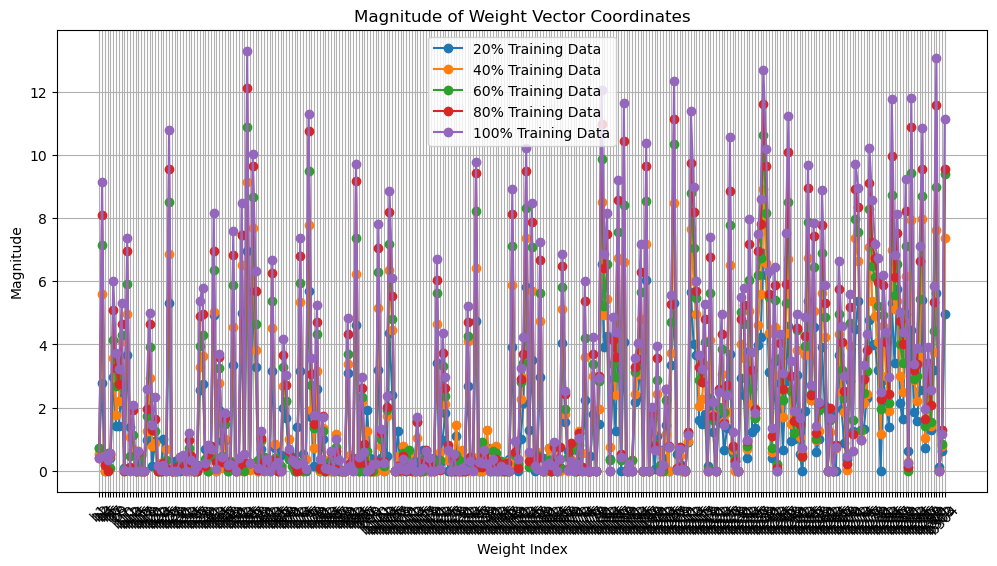

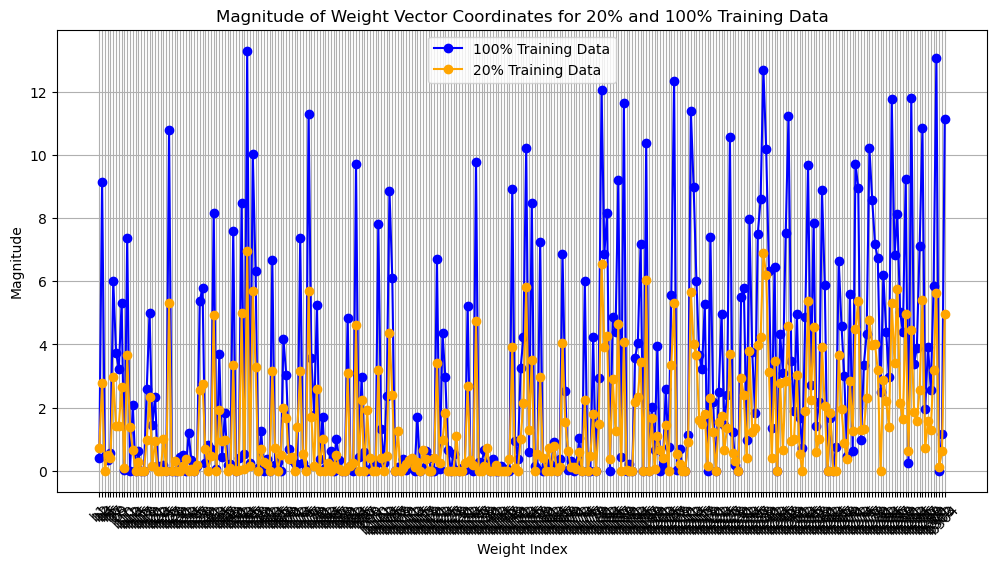

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming dftrain and dfvalid are already defined
# Step 1: Define the unique set of emojis for f1 to f8 and f9 to f13
unique_emojis_f1_to_f8 = sorted(dftrain.iloc[:, :8].stack().unique())  # Assuming f1 to f8 are columns 0 to 7
unique_emojis_f9_to_f13 = sorted(dftrain.iloc[:, 8:13].stack().unique())  # Assuming f9 to f13 are columns 8 to 12

# Step 2: Create mappings of emojis to indices for one-hot encoding
emoji_to_index_f1_to_f8 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f1_to_f8)}
emoji_to_index_f9_to_f13 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f9_to_f13)}

# Function to encode a single row for f1 to f8 and f9 to f13
def encode_row(row, emoji_to_index, num_emojis):
    encoded = np.zeros(num_emojis, dtype=int)
    unique_emojis = pd.unique(row)
    for emoji in unique_emojis:
        if emoji in emoji_to_index:
            encoded[emoji_to_index[emoji]] = 1
    return encoded

# Step 3: Encode both dftrain and dfvalid
def encode_dataset(df, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13):
    X_f1_to_f8 = np.array([encode_row(row, emoji_to_index_f1_to_f8, 213) for _, row in df.iloc[:, :8].iterrows()])
    X_f9_to_f13 = np.array([encode_row(row, emoji_to_index_f9_to_f13, 91) for _, row in df.iloc[:, 8:13].iterrows()])
    return np.hstack([X_f1_to_f8, X_f9_to_f13])  # Combine the two encoded parts horizontally

# Encode training and validation sets
X_train_encoded = encode_dataset(dftrain, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)
X_valid_encoded = encode_dataset(dfvalid, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)

y_train = dftrain.iloc[:, -1]
y_valid = dfvalid.iloc[:, -1]

# Step 4: Train a logistic regression model and evaluate accuracy
percentages = [20, 40, 60, 80, 100]
accuracies = []

weights_magnitudes = []  # To store weight magnitudes for each percentage

for pct in percentages:
    # Subset the training data
    sample_size = int((pct / 100) * len(dftrain))
    X_train_sample = X_train_encoded[:sample_size, :]
    y_train_sample = y_train[:sample_size]
    
    # Train logistic regression with L1 regularization
    #model = LogisticRegression(penalty='l1', C=20, solver='liblinear')
    model = LogisticRegression(
        penalty='elasticnet', 
        solver='saga',  # Only the 'saga' solver supports elasticnet
        l1_ratio=0.9,  # Balance between L1 and L2 regularization
        C=3,  # Inverse of regularization strength
        max_iter=300
    )
#     achieved 98.57 max, 93.25 20 percent
#     model = LogisticRegression(
#         penalty='elasticnet', 
#         solver='saga',  # Only the 'saga' solver supports elasticnet
#         l1_ratio=0.9,  # Balance between L1 and L2 regularization
#         C=5,  # Inverse of regularization strength
#         max_iter=300
#     )
    model.fit(X_train_sample, y_train_sample)
    
    # Validate on the validation set
    y_valid_pred = model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy)
    
    # Store the magnitude of the weights
    weights_magnitudes.append(np.abs(model.coef_[0]))
    
    print(f"Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Step 5: Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Training Data Size (Logistic Regression with Encoded Features)")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()

# Step 6: Plot the magnitudes of the weight vector
plt.figure(figsize=(12, 6))
for idx, magnitudes in enumerate(weights_magnitudes):
    plt.plot(range(len(magnitudes)), magnitudes, marker='o', label=f"{percentages[idx]}% Training Data")
    
plt.title("Magnitude of Weight Vector Coordinates")
plt.xlabel("Weight Index")
plt.ylabel("Magnitude")
plt.xticks(range(len(magnitudes)), [f'b{i+1}' for i in range(len(magnitudes))], rotation=45)
plt.legend()
plt.grid(True)
plt.show()

# Step 6: Plot the magnitudes of the weight vector for 20% and 100% of the dataset
plt.figure(figsize=(12, 6))

# Get the weight magnitudes for 20% and 100% of the training data
weights_20 = weights_magnitudes[0]  # 20%
weights_100 = weights_magnitudes[-1]  # 100%

# Plotting both weight magnitudes
plt.plot(range(len(weights_100)), weights_100, marker='o', label='100% Training Data', color='blue')
plt.plot(range(len(weights_20)), weights_20, marker='o', label='20% Training Data', color='orange')


plt.title("Magnitude of Weight Vector Coordinates for 20% and 100% Training Data")
plt.xlabel("Weight Index")
plt.ylabel("Magnitude")
plt.xticks(range(len(weights_20)), [f'b{i+1}' for i in range(len(weights_20))], rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Training on 20% of the data - Validation Accuracy: 93.047%
Training on 40% of the data - Validation Accuracy: 95.092%
Training on 60% of the data - Validation Accuracy: 95.501%
Training on 80% of the data - Validation Accuracy: 96.933%
Training on 100% of the data - Validation Accuracy: 98.160%


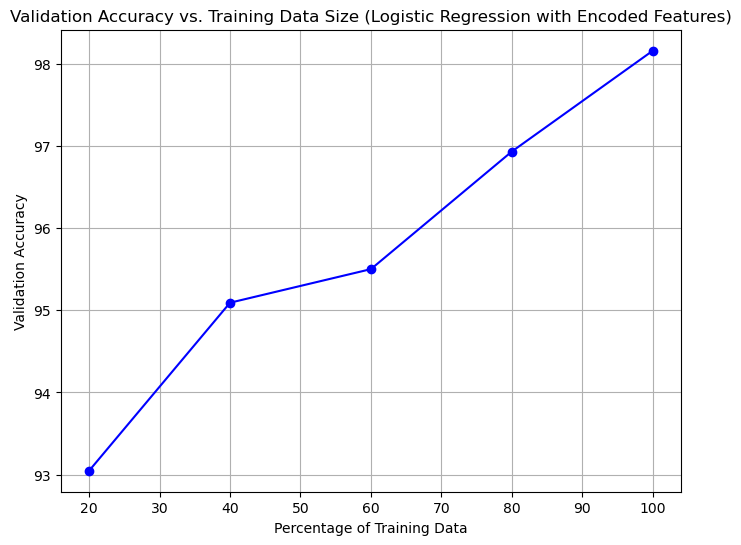

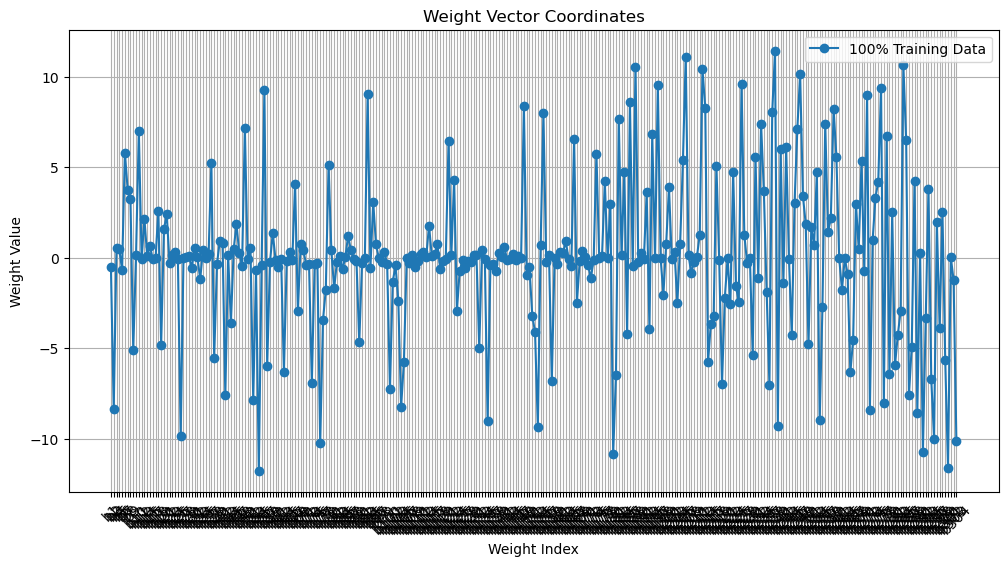

In [8]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming dftrain and dfvalid are already defined
# Step 1: Define the unique set of emojis for f1 to f8 and f9 to f13
unique_emojis_f1_to_f8 = sorted(dftrain.iloc[:, :8].stack().unique())  # Assuming f1 to f8 are columns 0 to 7
unique_emojis_f9_to_f13 = sorted(dftrain.iloc[:, 8:13].stack().unique())  # Assuming f9 to f13 are columns 8 to 12

# Step 2: Create mappings of emojis to indices for one-hot encoding
emoji_to_index_f1_to_f8 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f1_to_f8)}
emoji_to_index_f9_to_f13 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f9_to_f13)}

# Function to encode a single row for f1 to f8 and f9 to f13
def encode_row(row, emoji_to_index, num_emojis):
    encoded = np.zeros(num_emojis, dtype=int)
    unique_emojis = pd.unique(row)
    for emoji in unique_emojis:
        if emoji in emoji_to_index:
            encoded[emoji_to_index[emoji]] = 1
    return encoded

# Step 3: Encode both dftrain and dfvalid
def encode_dataset(df, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13):
    X_f1_to_f8 = np.array([encode_row(row, emoji_to_index_f1_to_f8, 213) for _, row in df.iloc[:, :8].iterrows()])
    X_f9_to_f13 = np.array([encode_row(row, emoji_to_index_f9_to_f13, 91) for _, row in df.iloc[:, 8:13].iterrows()])
    return np.hstack([X_f1_to_f8, X_f9_to_f13])  # Combine the two encoded parts horizontally

# Encode training and validation sets
X_train_encoded = encode_dataset(dftrain, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)
X_valid_encoded = encode_dataset(dfvalid, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)

y_train = dftrain.iloc[:, -1]
y_valid = dfvalid.iloc[:, -1]

# Step 4: Train a logistic regression model and evaluate accuracy
percentages = [20, 40, 60, 80, 100]
accuracies = []

weights_values = []  # To store weight values for each percentage

for pct in percentages:
    # Subset the training data
    sample_size = int((pct / 100) * len(dftrain))
    X_train_sample = X_train_encoded[:sample_size, :]
    y_train_sample = y_train[:sample_size]
    
    # Train logistic regression with L1 regularization
    model = LogisticRegression(penalty='l2', C=11, solver='liblinear')
    model.fit(X_train_sample, y_train_sample)
    
    # Validate on the validation set
    y_valid_pred = model.predict(X_valid_encoded)
    valid_accuracy = 100*accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy)
    
    # Store the weights
    weights_values.append(model.coef_[0])  # Store the actual weight values
    
    print(f"Training on {pct}% of the data - Validation Accuracy: {valid_accuracy:.3f}%")

# Step 5: Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Training Data Size (Logistic Regression with Encoded Features)")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()

# Step 6: Plot the actual values of the weight vector
plt.figure(figsize=(12, 6))
for idx, values in enumerate(weights_values):
    if  idx== 4:
        plt.plot(range(len(values)), values, marker='o', label=f"{percentages[idx]}% Training Data")
    
plt.title("Weight Vector Coordinates")
plt.xlabel("Weight Index")
plt.ylabel("Weight Value")
plt.xticks(range(len(values)), [f'b{i+1}' for i in range(len(values))], rotation=45)
plt.legend()
plt.grid(True)
plt.show()

Training on 20% of the data - Validation Accuracy: 93.25%
Training on 40% of the data - Validation Accuracy: 95.09%
Training on 60% of the data - Validation Accuracy: 95.50%
Training on 80% of the data - Validation Accuracy: 96.73%
Training on 100% of the data - Validation Accuracy: 98.16%


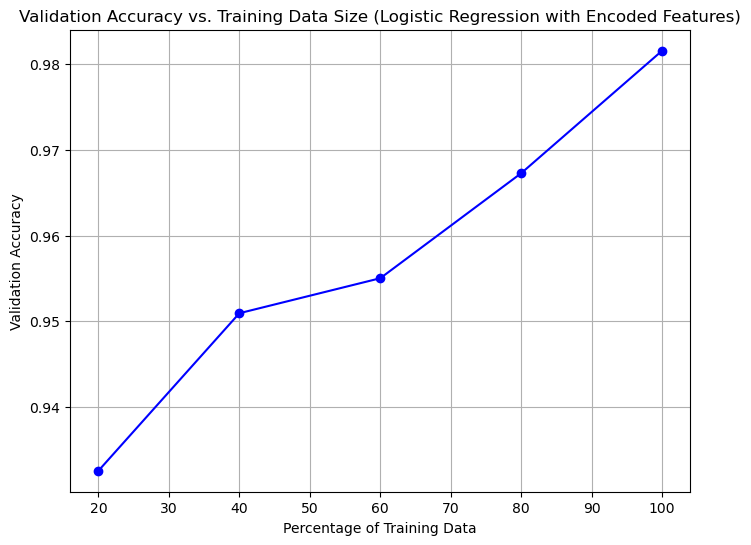

In [219]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming dftrain and dfvalid are already defined
# Step 1: Define the unique set of emojis for f1 to f8 and f9 to f13
unique_emojis_f1_to_f8 = sorted(dftrain.iloc[:, :8].stack().unique())  # f1 to f8 columns (0 to 7)
unique_emojis_f9_to_f13 = sorted(dftrain.iloc[:, 8:13].stack().unique())  # f9 to f13 columns (8 to 12)

# Define the specific emoji "U+1F66F" and common emojis to exclude
emoji_to_remove = "🙯"
common_emojis_f1_to_f8 = ["😛", "🛐", "😑", "🚼","😣"]  # replace with actual common emojis
common_emojis_f9_to_f13 = ["😣", "😑"]  # replace with actual common emojis

# Remove "U+1F66F" and common emojis from the unique emoji sets
unique_emojis_f1_to_f8 = [emoji for emoji in unique_emojis_f1_to_f8 if emoji not in [emoji_to_remove] + common_emojis_f1_to_f8]
unique_emojis_f9_to_f13 = [emoji for emoji in unique_emojis_f9_to_f13 if emoji not in [emoji_to_remove] + common_emojis_f9_to_f13]

# Step 2: Create mappings of emojis to indices for one-hot encoding
emoji_to_index_f1_to_f8 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f1_to_f8)}
emoji_to_index_f9_to_f13 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f9_to_f13)}

# Function to encode a single row for f1 to f8 and f9 to f13 with at most 2 ones
def encode_row(row, emoji_to_index, num_emojis, max_ones=2):
    encoded = np.zeros(num_emojis, dtype=int)
    unique_emojis = [emoji for emoji in pd.unique(row) if emoji in emoji_to_index]
    
    # Limit the number of ones to max_ones
    for emoji in unique_emojis[:max_ones]:
        encoded[emoji_to_index[emoji]] = 1
    return encoded

# Step 3: Encode both dftrain and dfvalid
def encode_dataset(df, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13):
    X_f1_to_f8 = np.array([encode_row(row, emoji_to_index_f1_to_f8, len(unique_emojis_f1_to_f8)) for _, row in df.iloc[:, :8].iterrows()])
    X_f9_to_f13 = np.array([encode_row(row, emoji_to_index_f9_to_f13, len(unique_emojis_f9_to_f13)) for _, row in df.iloc[:, 8:13].iterrows()])
    return np.hstack([X_f1_to_f8, X_f9_to_f13])  # Combine the two encoded parts horizontally

# Encode training and validation sets
X_train_encoded = encode_dataset(dftrain, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)
X_valid_encoded = encode_dataset(dfvalid, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)

y_train = dftrain.iloc[:, -1]
y_valid = dfvalid.iloc[:, -1]

# Step 4: Train a logistic regression model and evaluate accuracy
percentages = [20, 40, 60, 80, 100]
accuracies = []

for pct in percentages:
    # Subset the training data
    sample_size = int((pct / 100) * len(dftrain))
    X_train_sample = X_train_encoded[:sample_size, :]
    y_train_sample = y_train[:sample_size]
    
    # Train logistic regression with L2 regularization
    model = LogisticRegression(penalty='l2', C=10, solver='lbfgs')
    model.fit(X_train_sample, y_train_sample)
    
    # Validate on the validation set
    y_valid_pred = model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy)
    
    print(f"Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Step 5: Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Training Data Size (Logistic Regression with Encoded Features)")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()

In [9]:
print(f"Length of the final weight vector for {pct}% data: {len(model.coef_[0])}")


Length of the final weight vector for 100% data: 304


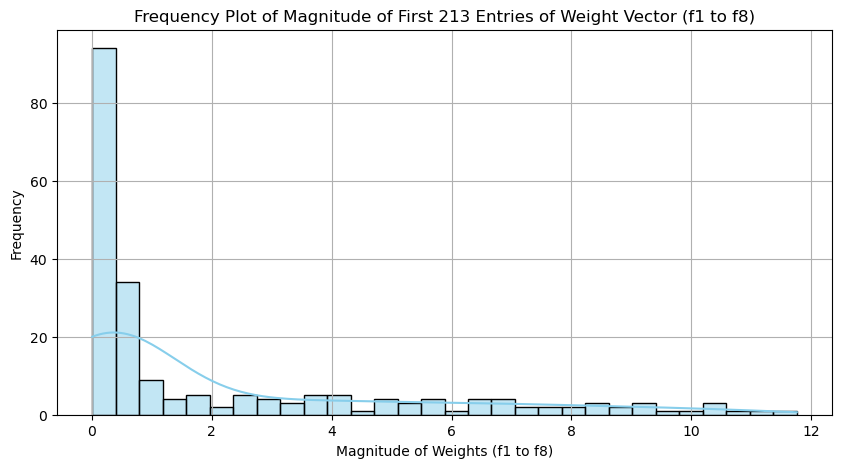

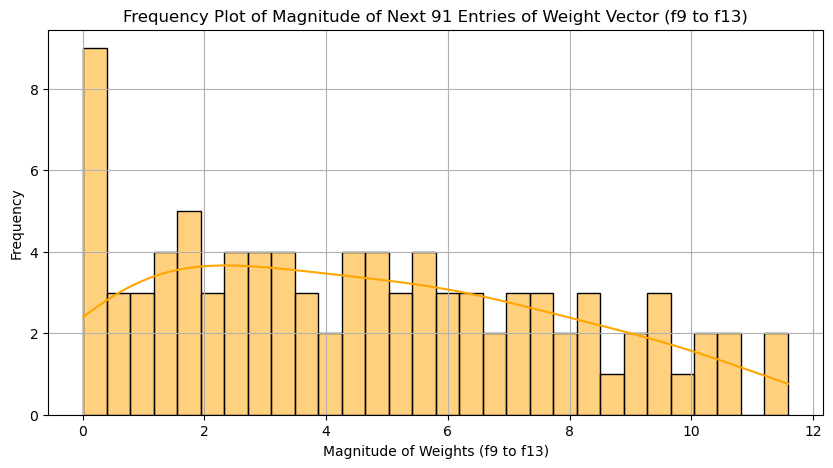

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the logistic regression model has been trained and weights_values contain the weights
final_weights = weights_values[-1]  # Get the final weight vector (after 100% of training data)

# Step 1: Extract the first 213 entries and the next 91 entries from the final weight vector
weights_f1_to_f8 = final_weights[:213]  # First 213 entries
weights_f9_to_f13 = final_weights[213:304]  # Next 91 entries

# Step 2: Compute the magnitudes of the weights
magnitudes_f1_to_f8 = np.abs(weights_f1_to_f8)  # Magnitude of first 213 weights
magnitudes_f9_to_f13 = np.abs(weights_f9_to_f13)  # Magnitude of next 91 weights

# Step 3: Plot the frequency plot of the magnitudes for each part

# Plot for f1 to f8 (First 213 entries)
plt.figure(figsize=(10, 5))
sns.histplot(magnitudes_f1_to_f8, bins=30, color='skyblue', kde=True)
plt.title("Frequency Plot of Magnitude of First 213 Entries of Weight Vector (f1 to f8)")
plt.xlabel("Magnitude of Weights (f1 to f8)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot for f9 to f13 (Next 91 entries)
plt.figure(figsize=(10, 5))
sns.histplot(magnitudes_f9_to_f13, bins=30, color='orange', kde=True)
plt.title("Frequency Plot of Magnitude of Next 91 Entries of Weight Vector (f9 to f13)")
plt.xlabel("Magnitude of Weights (f9 to f13)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


In [11]:
emojicodes = pd.read_csv('/Users/adityagautam/Desktop/CS771 Project/emoji_codes.csv')

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming `emojicodes` has two columns: 'emoji' and 'weight_magnitude'
# And the logistic regression has been trained and we have `final_weights`

# Step 1: Create a mapping from emoji to weight magnitude
emoji_to_magnitude = dict(zip(emojicodes['emoji'], emojicodes['code']))

# Step 2: Replace the magnitudes of the learned weights using emoji weights
def adjust_weights_with_emoji_magnitude(weights, emoji_df, dftrain, emoji_to_index):
    # Placeholder for new weights
    adjusted_weights = np.zeros_like(weights)

    # Iterate through f1 to f8 and f9 to f13 (since the columns correspond to emojis)
    for idx, weight in enumerate(weights):
        # Get the corresponding emoji from dftrain (first columns, assuming the order corresponds to f1 to f13)
        if idx < 213:
            emoji_column = dftrain.iloc[:, :8].stack().unique()  # Emojis for f1 to f8
        else:
            emoji_column = dftrain.iloc[:, 8:13].stack().unique()  # Emojis for f9 to f13

        emoji = emoji_column[idx % len(emoji_column)]  # Access correct emoji

        # Look up the weight magnitude for that emoji
        if emoji in emoji_to_magnitude:
            magnitude = emoji_to_magnitude[emoji]

            # Replace the magnitude but keep the original sign
            adjusted_weights[idx] = np.sign(weight) * magnitude
    
    return adjusted_weights

# Step 3: Adjust the final weights
adjusted_weights = adjust_weights_with_emoji_magnitude(final_weights, emojicodes, dftrain, emoji_to_index_f1_to_f8)

# Step 4: Replace the model's weights with adjusted weights
# Since we're directly modifying the weights, we must ensure our predictions use these weights
def apply_custom_weights(X, adjusted_weights):
    return np.dot(X, adjusted_weights)

# Apply the adjusted weights to the validation set
y_valid_pred_adjusted = apply_custom_weights(X_valid_encoded, adjusted_weights)
y_valid_pred_adjusted = np.where(y_valid_pred_adjusted >= 0.5, 1, 0)  # Assuming binary classification (0 or 1)

# Step 5: Evaluate the validation accuracy
valid_accuracy_adjusted = accuracy_score(y_valid, y_valid_pred_adjusted)
print(f"Validation Accuracy with Adjusted Weights: {valid_accuracy_adjusted:.3f}%")


Validation Accuracy with Adjusted Weights: 0.515%


In [15]:
import numpy as np
from sklearn.metrics import accuracy_score

# Step 1: Adjust weights based on emoji magnitudes (this is from the previous step)
def adjust_weights_with_emoji_magnitude(weights, emoji_df, dftrain, emoji_to_index):
    adjusted_weights = np.zeros_like(weights)

    for idx, weight in enumerate(weights):
        if idx < 213:
            emoji_column = dftrain.iloc[:, :8].stack().unique()  # Emojis for f1 to f8
        else:
            emoji_column = dftrain.iloc[:, 8:13].stack().unique()  # Emojis for f9 to f13

        emoji = emoji_column[idx % len(emoji_column)]  # Access correct emoji

        if emoji in emoji_to_magnitude:
            magnitude = emoji_to_magnitude[emoji]
            adjusted_weights[idx] = np.sign(weight) * magnitude
    
    return adjusted_weights

# Step 2: Compute predictions using the adjusted weights and a bias term
def apply_custom_weights_with_bias(X, adjusted_weights, bias):
    return np.dot(X, adjusted_weights) + bias  # Add bias term to the weighted sum

# Step 3: Define a function to find the optimal bias value
def find_best_bias(X_valid, y_valid, adjusted_weights):
    best_bias = None
    best_accuracy = 0

    # Search for the best bias value in a reasonable range
    bias_range = np.linspace(-1000000, 1000000, 100)  # Bias search range, can be adjusted as needed

    for bias in bias_range:
        y_valid_pred = apply_custom_weights_with_bias(X_valid, adjusted_weights, bias)
        y_valid_pred = np.where(y_valid_pred >= 0.5, 1, 0)  # Convert to binary prediction
        
        valid_accuracy = accuracy_score(y_valid, y_valid_pred)

        if valid_accuracy > best_accuracy:
            best_accuracy = valid_accuracy
            best_bias = bias

    return best_bias, best_accuracy

# Step 4: Adjust the weights using the emoji magnitude mapping
adjusted_weights = adjust_weights_with_emoji_magnitude(final_weights, emojicodes, dftrain, emoji_to_index_f1_to_f8)

# Step 5: Find the best bias term and get the validation accuracy
best_bias, best_valid_accuracy = find_best_bias(X_valid_encoded, y_valid, adjusted_weights)

print(f"Best Bias: {best_bias:.3f}")
print(f"Validation Accuracy with Adjusted Weights and Optimal Bias: {best_valid_accuracy:.3f}%")


Best Bias: 111111.111
Validation Accuracy with Adjusted Weights and Optimal Bias: 0.628%


In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming dftrain and dfvalid are already defined
# Step 1: Define the unique set of emojis for f1 to f8 and f9 to f13
unique_emojis_f1_to_f8 = sorted(dftrain.iloc[:, :8].stack().unique())  # f1 to f8 columns (0 to 7)
unique_emojis_f9_to_f13 = sorted(dftrain.iloc[:, 8:13].stack().unique())  # f9 to f13 columns (8 to 12)

# Define the specific emoji "U+1F66F" and common emojis to exclude
emoji_to_remove = "🙯"
common_emojis_f1_to_f8 = ["😛", "🛐", "😑", "🚼", "😣"]  # replace with actual common emojis
common_emojis_f9_to_f13 = ["😣", "😑"]  # replace with actual common emojis

# Remove "U+1F66F" and common emojis from the unique emoji sets
unique_emojis_f1_to_f8 = [emoji for emoji in unique_emojis_f1_to_f8 if emoji not in [emoji_to_remove] + common_emojis_f1_to_f8]
unique_emojis_f9_to_f13 = [emoji for emoji in unique_emojis_f9_to_f13 if emoji not in [emoji_to_remove] + common_emojis_f9_to_f13]

# Step 2: Create mappings of emojis to indices for one-hot encoding
emoji_to_index_f1_to_f8 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f1_to_f8)}
emoji_to_index_f9_to_f13 = {emoji: idx for idx, emoji in enumerate(unique_emojis_f9_to_f13)}

# Function to encode a single row for f1 to f8 and f9 to f13 with at most 2 ones
def encode_row(row, emoji_to_index, num_emojis, max_ones=2):
    encoded = np.zeros(num_emojis, dtype=int)
    unique_emojis = [emoji for emoji in pd.unique(row) if emoji in emoji_to_index]
    
    # Limit the number of ones to max_ones
    for emoji in unique_emojis[:max_ones]:
        encoded[emoji_to_index[emoji]] = 1
    return encoded

# Step 3: Encode both dftrain and dfvalid
def encode_dataset(df, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13):
    X_f1_to_f8 = np.array([encode_row(row, emoji_to_index_f1_to_f8, len(unique_emojis_f1_to_f8)) for _, row in df.iloc[:, :8].iterrows()])
    X_f9_to_f13 = np.array([encode_row(row, emoji_to_index_f9_to_f13, len(unique_emojis_f9_to_f13)) for _, row in df.iloc[:, 8:13].iterrows()])
    return np.hstack([X_f1_to_f8, X_f9_to_f13])  # Combine the two encoded parts horizontally

# Encode training and validation sets
X_train_encoded = encode_dataset(dftrain, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)
X_valid_encoded = encode_dataset(dfvalid, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)

y_train = dftrain.iloc[:, -1]
y_valid = dfvalid.iloc[:, -1]

# Step 4: Apply StandardScaler
scaler = StandardScaler()

# Scale the training and validation sets
X_train_encoded_scaled = scaler.fit_transform(X_train_encoded)
X_valid_encoded_scaled = scaler.transform(X_valid_encoded)

# Models and hyperparameters to tweak
models = {
    'Logistic Regression': LogisticRegression(penalty='l1', C=10.0, max_iter=2000, solver = 'liblinear'),
    'Linear SVM': SVC(kernel='linear', C=1.0, max_iter=5000),
    'XGBoost': XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=20)
    #'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=20, min_samples_split=5)
}

# Step 5: Train the models and evaluate accuracy
percentages = [20, 40, 60, 80, 100]
accuracies = {model_name: [] for model_name in models}

for pct in percentages:
    # Subset the training data
    sample_size = int((pct / 100) * len(dftrain))
    X_train_sample = X_train_encoded_scaled[:sample_size, :]
    y_train_sample = y_train[:sample_size]
    
    # Train each model
    for model_name, model in models.items():
        model.fit(X_train_sample, y_train_sample)
        
        # Validate on the validation set
        y_valid_pred = model.predict(X_valid_encoded_scaled)
        valid_accuracy = accuracy_score(y_valid, y_valid_pred)
        accuracies[model_name].append(valid_accuracy)
        print(f"Model: {model_name}, Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Step 6: Plot the accuracy for each model
plt.figure(figsize=(10, 8))
for model_name, model_accuracies in accuracies.items():
    plt.plot(percentages, model_accuracies, marker='o', linestyle='-', label=model_name)

plt.title("Validation Accuracy vs. Training Data Size (Different Models)")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()

Model: Logistic Regression, Training on 20% of the data - Validation Accuracy: 94.07%


/Users/adityagautam/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model: Linear SVM, Training on 20% of the data - Validation Accuracy: 92.64%
Model: XGBoost, Training on 20% of the data - Validation Accuracy: 89.78%
Model: Logistic Regression, Training on 40% of the data - Validation Accuracy: 94.68%


/Users/adityagautam/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model: Linear SVM, Training on 40% of the data - Validation Accuracy: 94.27%
Model: XGBoost, Training on 40% of the data - Validation Accuracy: 94.27%
Model: Logistic Regression, Training on 60% of the data - Validation Accuracy: 96.73%


/Users/adityagautam/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model: Linear SVM, Training on 60% of the data - Validation Accuracy: 96.93%
Model: XGBoost, Training on 60% of the data - Validation Accuracy: 96.52%
Model: Logistic Regression, Training on 80% of the data - Validation Accuracy: 98.36%


/Users/adityagautam/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model: Linear SVM, Training on 80% of the data - Validation Accuracy: 96.93%
Model: XGBoost, Training on 80% of the data - Validation Accuracy: 97.14%


KeyboardInterrupt: 

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Assuming dftrain and dfvalid are already defined
# ... (The data encoding steps remain the same)

# Encode training and validation sets
X_train_encoded = encode_dataset(dftrain, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)
X_valid_encoded = encode_dataset(dfvalid, emoji_to_index_f1_to_f8, emoji_to_index_f9_to_f13)

y_train = dftrain.iloc[:, -1]
y_valid = dfvalid.iloc[:, -1]

# Step 4: Apply StandardScaler
scaler = StandardScaler()

# Scale the training and validation sets
X_train_encoded_scaled = scaler.fit_transform(X_train_encoded)
X_valid_encoded_scaled = scaler.transform(X_valid_encoded)

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300, 400, 800],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10, 20],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier()

# Subset the training data to 20%
sample_size = int(0.2 * len(dftrain))
X_train_20_percent = X_train_encoded_scaled[:sample_size, :]
y_train_20_percent = y_train[:sample_size]

# Use GridSearchCV to find the best hyperparameters on the 20% dataset
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,  # 3-fold cross-validation
                           verbose=1,
                           n_jobs=-1)  # Use all available cores

# Fit GridSearchCV on the 20% training data
grid_search.fit(X_train_20_percent, y_train_20_percent)

# Get the best hyperparameters and the best score on the 20% dataset
best_params_20 = grid_search.best_params_
best_score_20 = grid_search.best_score_

print("Best Hyperparameters on 20% Data:", best_params_20)
print("Best Cross-Validation Accuracy on 20% Data:", best_score_20)

# Train the best model on the full training set with the best hyperparameters
best_xgb_model = XGBClassifier(**best_params_20)
best_xgb_model.fit(X_train_encoded_scaled, y_train)

# Validate the model on the validation set
y_valid_pred = best_xgb_model.predict(X_valid_encoded_scaled)
valid_accuracy_full_data = accuracy_score(y_valid, y_valid_pred)

# Calculate the accuracy on the full training dataset
train_accuracy_full_data = accuracy_score(y_train, best_xgb_model.predict(X_train_encoded_scaled))

print(f"Validation Accuracy of Best Model on Full Dataset: {valid_accuracy_full_data * 100:.2f}%")
print(f"Training Accuracy of Best Model on Full Dataset: {train_accuracy_full_data * 100:.2f}%")

# Check if the accuracy on the full dataset is greater than on the 20% dataset
if valid_accuracy_full_data > best_score_20:
    print("The validation accuracy on the full dataset is greater than on the 20% dataset.")
else:
    print("The validation accuracy on the full dataset is not greater than on the 20% dataset.")

Fitting 3 folds for each of 1620 candidates, totalling 4860 fits
Best Hyperparameters on 20% Data: {'colsample_bytree': 0.5, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 800, 'subsample': 1.0}
Best Cross-Validation Accuracy on 20% Data: 0.8968926553672317
Validation Accuracy of Best Model on Full Dataset: 96.52%
Training Accuracy of Best Model on Full Dataset: 98.18%
The validation accuracy on the full dataset is greater than on the 20% dataset.


Training on 20% of the data - Validation Accuracy: 79.75%
Training on 40% of the data - Validation Accuracy: 82.41%
Training on 60% of the data - Validation Accuracy: 81.19%
Training on 80% of the data - Validation Accuracy: 81.19%
Training on 100% of the data - Validation Accuracy: 81.39%


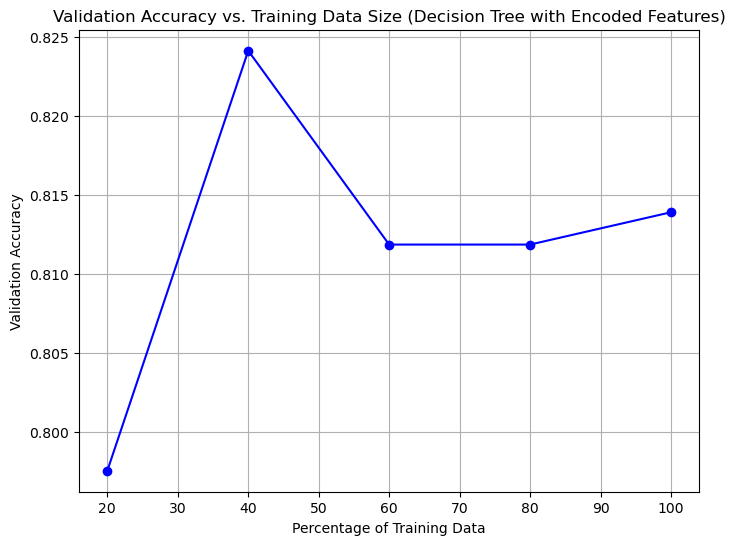

In [128]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Step 4: Train a decision tree model and evaluate accuracy
percentages = [20, 40, 60, 80, 100]
accuracies = []

for pct in percentages:
    # Subset the training data
    sample_size = int((pct / 100) * len(dftrain))
    X_train_sample = X_train_encoded[:sample_size, :]
    y_train_sample = y_train[:sample_size]
    
    # Train a decision tree classifier
    model = DecisionTreeClassifier(random_state=42, max_depth=500)  # You can experiment with max_depth
    model.fit(X_train_sample, y_train_sample)
    
    # Validate on the validation set
    y_valid_pred = model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy)
    
    print(f"Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Step 5: Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Training Data Size (Decision Tree with Encoded Features)")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()

In [117]:
import pandas as pd

# Assuming dftrain is already defined

# Look at the first 100 entries of dftrain
dftrain_sample = dftrain.iloc[:1000, :]

# Function to find emojis that appear in multiple features within the same row
def find_repeated_emojis(row):
    repeated_emojis = set()
    unique_emojis = set()
    
    # Iterate over all features in the row
    for emoji in row:
        if emoji in unique_emojis:
            repeated_emojis.add(emoji)  # Emoji appeared before, so it's repeated
        else:
            unique_emojis.add(emoji)
    
    return list(repeated_emojis)

# Apply the function to each row in the sample and find repeated emojis
dftrain_sample['repeated_emojis'] = dftrain_sample.apply(find_repeated_emojis, axis=1)

# Filter the rows where repeated emojis exist
repeated_emoji_examples = dftrain_sample[dftrain_sample['repeated_emojis'].apply(lambda x: len(x) > 0)]

# Display the rows with repeated emojis
print(repeated_emoji_examples[['repeated_emojis']])

# Optionally, you can view all repeated emojis across the dataset
all_repeated_emojis = repeated_emoji_examples['repeated_emojis'].explode().unique()
print("All repeated emojis:", all_repeated_emojis)

    repeated_emojis
0         [😑, 😣, 🙯]
1         [😑, 😣, 🙯]
2         [😑, 😣, 🙯]
3         [😑, 😣, 🙯]
4         [😑, 😣, 🙯]
..              ...
995       [😑, 😣, 🙯]
996       [😑, 😣, 🙯]
997       [😑, 😣, 🙯]
998       [😑, 😣, 🙯]
999       [😑, 😣, 🙯]

[1000 rows x 1 columns]
All repeated emojis: ['😑' '😣' '🙯' '🛀' '🙄' '\U0001f6df' '🙒' '🚰' '😕' '😚' '😱' '🙊' '🚷' '🚟' '🛓' '🛑']


/var/folders/12/kxf9_p7s785_t9bymwdx1wsc0000gn/T/ipykernel_34073/2415869292.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dftrain_sample['repeated_emojis'] = dftrain_sample.apply(find_repeated_emojis, axis=1)


In [9]:
# Features and labels for training and validation
X_train = dftrain.iloc[:, :-1]  # All columns except the last one (features)
y_train = dftrain.iloc[:, -1]   # Last column (binary label)

X_valid = dfvalid.iloc[:, :-1].reindex(columns=X_train.columns)  # Align columns with training set
y_valid = dfvalid.iloc[:, -1]

# Test dataset (features only, no labels)
X_test = dftest.reindex(columns=X_train.columns)  # Align columns with training set

# One-Hot Encoding for emojis (fitting on training data and applying to all sets)
encoder = OneHotEncoder(sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)
X_valid_encoded = encoder.transform(X_valid)
#X_test_encoded = encoder.transform(X_test)  # No labels for this

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_encoded, y_train)

# Validate the model on the validation dataset
y_valid_pred = model.predict(X_valid_encoded)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Generate predictions on the test dataset (without labels)
#y_test_pred = model.predict(X_test_encoded)
#print("Predictions on the test dataset (dftest):")
#print(y_test_pred)

Validation Accuracy: 89.37%


Baseline Validation Accuracy (100% data): 89.37%
Baseline Validation Accuracy (60% data): 85.28%
Validation Accuracy without f1 (100% data): 88.75%
Validation Accuracy without f1 (60% data): 82.82%


/Users/adityagautam/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy without f2 (100% data): 88.34%
Validation Accuracy without f2 (60% data): 84.46%
Validation Accuracy without f3 (100% data): 85.89%
Validation Accuracy without f3 (60% data): 82.82%
Validation Accuracy without f4 (100% data): 86.50%
Validation Accuracy without f4 (60% data): 82.82%
Validation Accuracy without f5 (100% data): 87.12%
Validation Accuracy without f5 (60% data): 83.03%
Validation Accuracy without f6 (100% data): 88.55%
Validation Accuracy without f6 (60% data): 84.05%


/Users/adityagautam/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy without f7 (100% data): 88.34%
Validation Accuracy without f7 (60% data): 83.23%
Validation Accuracy without f8 (100% data): 86.50%
Validation Accuracy without f8 (60% data): 82.41%
Validation Accuracy without f9 (100% data): 86.09%
Validation Accuracy without f9 (60% data): 80.37%
Validation Accuracy without f10 (100% data): 84.87%
Validation Accuracy without f10 (60% data): 82.62%
Validation Accuracy without f11 (100% data): 85.28%
Validation Accuracy without f11 (60% data): 82.62%
Validation Accuracy without f12 (100% data): 85.07%
Validation Accuracy without f12 (60% data): 80.37%
Validation Accuracy without f13 (100% data): 84.25%
Validation Accuracy without f13 (60% data): 79.75%


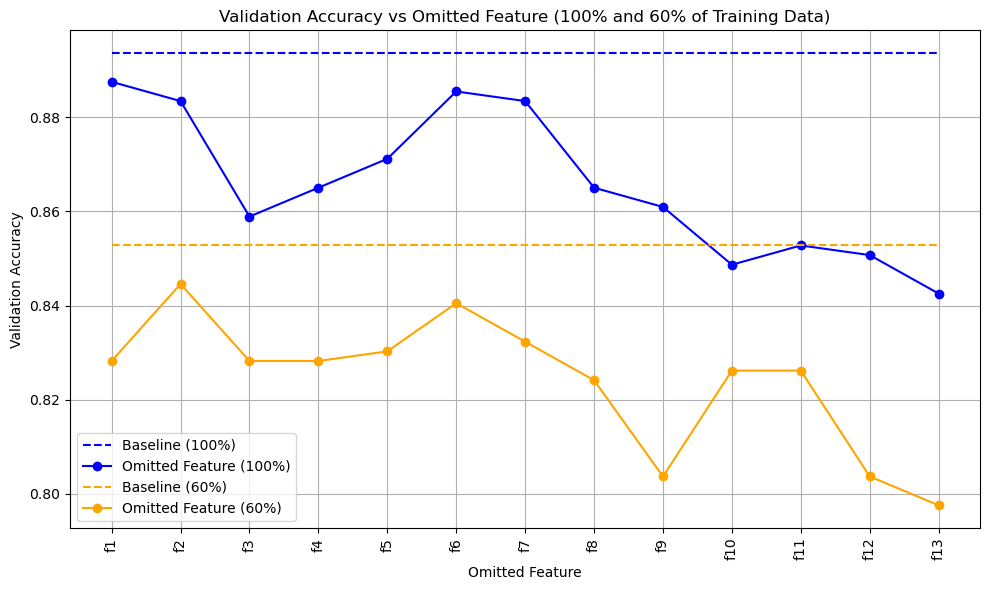

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Full dataset (100%)
X_train = dftrain.iloc[:, :-1]  # All columns except the last one (features)
y_train = dftrain.iloc[:, -1]   # Last column (binary label)

X_valid = dfvalid.iloc[:, :-1].reindex(columns=X_train.columns)  # Align columns with training set
y_valid = dfvalid.iloc[:, -1]

# 60% of the dataset
X_train_60 = X_train.sample(frac=0.6, random_state=42)
y_train_60 = y_train.loc[X_train_60.index]

# One-Hot Encoding for emojis
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(X_train)

# Lists to store accuracies
validation_accuracies_100 = []
validation_accuracies_60 = []
features = X_train.columns

# Baseline model (no feature omission)
X_train_encoded = encoder.transform(X_train)
X_valid_encoded = encoder.transform(X_valid)
X_train_60_encoded = encoder.transform(X_train_60)

# Baseline model accuracy (100% of the data)
model = LogisticRegression()
model.fit(X_train_encoded, y_train)
y_valid_pred = model.predict(X_valid_encoded)
baseline_accuracy_100 = accuracy_score(y_valid, y_valid_pred)

# Baseline model accuracy (60% of the data)
model.fit(X_train_60_encoded, y_train_60)
y_valid_pred_60 = model.predict(X_valid_encoded)
baseline_accuracy_60 = accuracy_score(y_valid, y_valid_pred_60)

# Print baseline accuracies
print(f"Baseline Validation Accuracy (100% data): {baseline_accuracy_100 * 100:.2f}%")
print(f"Baseline Validation Accuracy (60% data): {baseline_accuracy_60 * 100:.2f}%")

# Loop through each feature and omit it
for feature in features:
    # Omit the feature
    X_train_omit = X_train.drop(columns=[feature])
    X_train_60_omit = X_train_60.drop(columns=[feature])
    X_valid_omit = X_valid.drop(columns=[feature])
    
    # Re-encode the datasets without the omitted feature
    encoder_omit = OneHotEncoder(sparse_output=False)
    encoder_omit.fit(X_train_omit)

    X_train_encoded_omit = encoder_omit.transform(X_train_omit)
    X_valid_encoded_omit = encoder_omit.transform(X_valid_omit)
    X_train_60_encoded_omit = encoder_omit.transform(X_train_60_omit)
    
    # Train and validate on 100% of the data
    model.fit(X_train_encoded_omit, y_train)
    y_valid_pred_omit = model.predict(X_valid_encoded_omit)
    valid_accuracy_omit_100 = accuracy_score(y_valid, y_valid_pred_omit)
    
    # Train and validate on 60% of the data
    model.fit(X_train_60_encoded_omit, y_train_60)
    y_valid_pred_omit_60 = model.predict(X_valid_encoded_omit)
    valid_accuracy_omit_60 = accuracy_score(y_valid, y_valid_pred_omit_60)
    
    # Store accuracies
    validation_accuracies_100.append(valid_accuracy_omit_100)
    validation_accuracies_60.append(valid_accuracy_omit_60)

    # Print omitted feature accuracy
    print(f"Validation Accuracy without {feature} (100% data): {valid_accuracy_omit_100 * 100:.2f}%")
    print(f"Validation Accuracy without {feature} (60% data): {valid_accuracy_omit_60 * 100:.2f}%")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(features, [baseline_accuracy_100] * len(features), label="Baseline (100%)", linestyle='--', color='blue')
plt.plot(features, validation_accuracies_100, label="Omitted Feature (100%)", marker='o', color='blue')
plt.plot(features, [baseline_accuracy_60] * len(features), label="Baseline (60%)", linestyle='--', color='orange')
plt.plot(features, validation_accuracies_60, label="Omitted Feature (60%)", marker='o', color='orange')
plt.xticks(rotation=90)
plt.xlabel("Omitted Feature")
plt.ylabel("Validation Accuracy")
plt.title("Validation Accuracy vs Omitted Feature (100% and 60% of Training Data)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Training on 20% of the data - Validation Accuracy: 70.14%
Training on 40% of the data - Validation Accuracy: 81.60%
Training on 60% of the data - Validation Accuracy: 88.75%
Training on 80% of the data - Validation Accuracy: 92.02%
Training on 100% of the data - Validation Accuracy: 92.84%


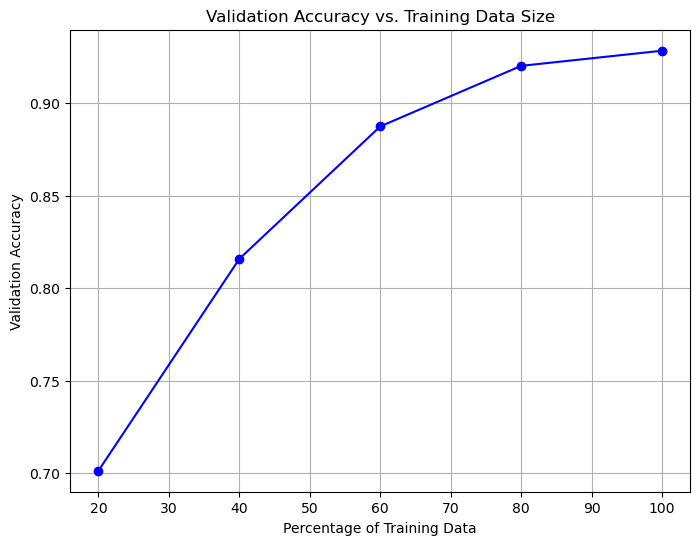

In [30]:


# Assuming dftrain and dfvalid are already defined
# Features and labels for validation set
X_valid = dfvalid.iloc[:, :-1].reindex(columns=dftrain.columns[:-1])  # Align columns with train set
y_valid = dfvalid.iloc[:, -1]

# One-Hot Encoder (fit only on full training data)
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(dftrain.iloc[:, :-1])

# Percentages of the dataset to be used
percentages = [20, 40, 60, 80, 100]
accuracies = []

# Loop over each percentage
for pct in percentages:
    # Subset the training data to the required percentage
    sample_size = int((pct / 100) * len(dftrain))
    dftrain_sample = dftrain.sample(n=sample_size, random_state=42)

    X_train_sample = dftrain_sample.iloc[:, :-1]
    y_train_sample = dftrain_sample.iloc[:, -1]
    
    # One-hot encode the training sample
    X_train_sample_encoded = encoder.transform(X_train_sample)
    X_valid_encoded = encoder.transform(X_valid)  # Validation set remains the same
    
    # Train the model on the training sample
    model = LogisticRegression(penalty='l1', C=10.0, solver='liblinear', max_iter = 300)
    model.fit(X_train_sample_encoded, y_train_sample)
    
    # Validate the model on the full validation set
    y_valid_pred = model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy)
    
    print(f"Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Training Data Size")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()

Training on 20% of the data - Validation Accuracy: 70.55%
Training on 40% of the data - Validation Accuracy: 84.05%
Training on 60% of the data - Validation Accuracy: 88.14%
Training on 80% of the data - Validation Accuracy: 89.37%
Training on 100% of the data - Validation Accuracy: 92.23%


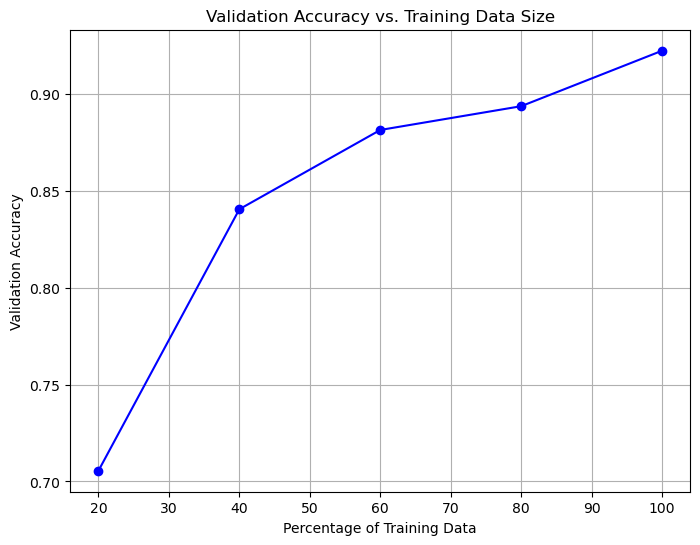

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Assuming dftrain and dfvalid are already defined
X_valid = dfvalid.iloc[:, :-1].reindex(columns=dftrain.columns[:-1])  # Align columns with train set
y_valid = dfvalid.iloc[:, -1]

# One-Hot Encoder for the entire training data
encoder = OneHotEncoder(sparse_output=False)
X_train_encoded = encoder.fit_transform(dftrain.iloc[:, :-1])
y_train = dftrain.iloc[:, -1]

# Create a pipeline with scaling and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardization
    ('log_reg', LogisticRegression(penalty='l1', solver='liblinear'))  # L1 regularization
])

# Define hyperparameter grid for tuning
param_grid = {
    'log_reg__C': [0.1, 1, 5, 10, 11, 20]  # Adjust C values
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5)  # 5-fold cross-validation

# Percentages of the dataset to be used
percentages = [20, 40, 60, 80, 100]
accuracies = []

# Loop over each percentage
for pct in percentages:
    # Subset the training data to the required percentage
    sample_size = int((pct / 100) * len(dftrain))
    dftrain_sample = dftrain.sample(n=sample_size, random_state=42)
    
    # Prepare data for training
    X_train_sample_encoded = encoder.transform(dftrain_sample.iloc[:, :-1])
    y_train_sample = dftrain_sample.iloc[:, -1]

    # Fit the model using GridSearchCV
    grid_search.fit(X_train_sample_encoded, y_train_sample)
    
    # Get the best model
    best_model = grid_search.best_estimator_

    # Validate the model on the full validation set
    X_valid_encoded = encoder.transform(X_valid)  # Transform validation set with the same encoder
    y_valid_pred = best_model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy)
    
    print(f"Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Training Data Size")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()

Model: Logistic Regression - Training on 20% of the data - Validation Accuracy: 70.35%
Model: Logistic Regression - Training on 40% of the data - Validation Accuracy: 81.60%
Model: Logistic Regression - Training on 60% of the data - Validation Accuracy: 88.75%
Model: Logistic Regression - Training on 80% of the data - Validation Accuracy: 92.02%
Model: Logistic Regression - Training on 100% of the data - Validation Accuracy: 92.84%
Model: SVM - Training on 20% of the data - Validation Accuracy: 57.67%
Model: SVM - Training on 40% of the data - Validation Accuracy: 69.53%
Model: SVM - Training on 60% of the data - Validation Accuracy: 73.62%
Model: SVM - Training on 80% of the data - Validation Accuracy: 80.37%
Model: SVM - Training on 100% of the data - Validation Accuracy: 82.41%
Model: Random Forest - Training on 20% of the data - Validation Accuracy: 58.08%
Model: Random Forest - Training on 40% of the data - Validation Accuracy: 69.12%
Model: Random Forest - Training on 60% of the 

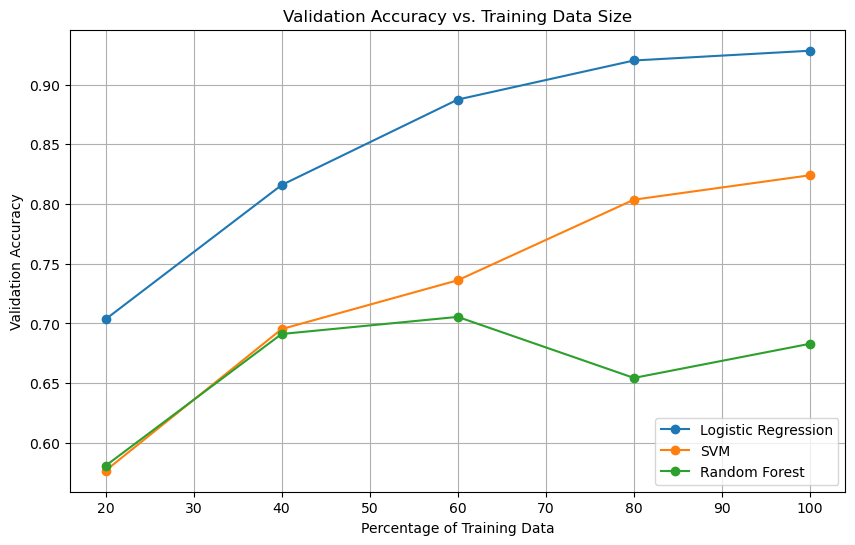

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Assuming dftrain and dfvalid are already defined
# Features and labels for validation set
X_valid = dfvalid.iloc[:, :-1].reindex(columns=dftrain.columns[:-1])  # Align columns with train set
y_valid = dfvalid.iloc[:, -1]

# One-Hot Encoder (fit only on full training data)
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(dftrain.iloc[:, :-1])

# Define the models to be used
models = {
    'Logistic Regression': LogisticRegression(penalty='l1', C=10.0, solver='liblinear', max_iter=300),
    'SVM': SVC(C=10.0, kernel='rbf', gamma='scale'),
    'Random Forest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
}

# Percentages of the dataset to be used
percentages = [20, 40, 60, 80, 100]

# To store accuracies for each model
all_accuracies = {}

# Loop through each model
for model_name, model in models.items():
    accuracies = []
    
    # Loop over each percentage
    for pct in percentages:
        # Subset the training data to the required percentage
        sample_size = int((pct / 100) * len(dftrain))
        dftrain_sample = dftrain.sample(n=sample_size, random_state=42)

        X_train_sample = dftrain_sample.iloc[:, :-1]
        y_train_sample = dftrain_sample.iloc[:, -1]

        # One-hot encode the training sample
        X_train_sample_encoded = encoder.transform(X_train_sample)
        X_valid_encoded = encoder.transform(X_valid)  # Validation set remains the same

        # Train the model on the training sample
        model.fit(X_train_sample_encoded, y_train_sample)

        # Validate the model on the full validation set
        y_valid_pred = model.predict(X_valid_encoded)
        valid_accuracy = accuracy_score(y_valid, y_valid_pred)
        accuracies.append(valid_accuracy)

        print(f"Model: {model_name} - Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")
    
    # Store accuracies for this model
    all_accuracies[model_name] = accuracies

# Plot the accuracy for each model
plt.figure(figsize=(10, 6))

for model_name, accuracies in all_accuracies.items():
    plt.plot(percentages, accuracies, marker='o', linestyle='-', label=model_name)

plt.title("Validation Accuracy vs. Training Data Size")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.legend(loc="lower right")
plt.grid(True)

# Save the plot as a file
plt.savefig("Dataset1_raw.png")

# Display the plot
plt.show()

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Assuming dftrain and dfvalid are already defined
X_valid = dfvalid.iloc[:, :-1].reindex(columns=dftrain.columns[:-1])  # Align columns with train set
y_valid = dfvalid.iloc[:, -1]

# One-Hot Encoder for the entire training data
encoder = OneHotEncoder(sparse_output=False)
X_train_encoded = encoder.fit_transform(dftrain.iloc[:, :-1])
y_train = dftrain.iloc[:, -1]

# Define the models to be used in the pipeline
models = {
    'Logistic Regression': LogisticRegression(penalty='l1', solver='liblinear'),
    'SVM': SVC(kernel='rbf'),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Define hyperparameter grids for tuning (for each model)
param_grids = {
    'Logistic Regression': {'log_reg__C': [0.1, 1, 5, 10, 11, 20]},
    'SVM': {'svm__C': [0.1, 1, 10], 'svm__gamma': ['scale', 'auto']},
    'Random Forest': {'random_forest__n_estimators': [100, 200, 500], 'random_forest__max_depth': [5, 10, 15]}
}

# Percentages of the dataset to be used
percentages = [20, 40, 60, 80, 100]

# To store accuracies for each model
all_accuracies = {}

# Loop through each model
for model_name, model in models.items():
    accuracies = []
    # Create a pipeline with scaling and the selected model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardization
        (model_name.lower().replace(" ", "_"), model)  # Insert the model dynamically in the pipeline
    ])
    
    # Initialize GridSearchCV with the hyperparameter grid specific to this model
    grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=5)  # 5-fold cross-validation
    
    # Loop over each percentage
    for pct in percentages:
        # Subset the training data to the required percentage
        sample_size = int((pct / 100) * len(dftrain))
        dftrain_sample = dftrain.sample(n=sample_size, random_state=42)

        # Prepare data for training
        X_train_sample_encoded = encoder.transform(dftrain_sample.iloc[:, :-1])
        y_train_sample = dftrain_sample.iloc[:, -1]

        # Fit the model using GridSearchCV
        grid_search.fit(X_train_sample_encoded, y_train_sample)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Validate the model on the full validation set
        X_valid_encoded = encoder.transform(X_valid)  # Transform validation set with the same encoder
        y_valid_pred = best_model.predict(X_valid_encoded)
        valid_accuracy = accuracy_score(y_valid, y_valid_pred)
        accuracies.append(valid_accuracy)

        print(f"Model: {model_name} - Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

    # Store accuracies for this model
    all_accuracies[model_name] = accuracies

# Plot the accuracy for each model
plt.figure(figsize=(10, 6))

for model_name, accuracies in all_accuracies.items():
    plt.plot(percentages, accuracies, marker='o', linestyle='-', label=model_name)

plt.title("Validation Accuracy vs. Training Data Size (Logistic Regression, SVM, Random Forest)")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.legend(loc="lower right")
plt.grid(True)

# Save the plot as a file
plt.savefig("Dataset1_raw.png", dpi == 300)

# Display the plot
plt.show()

ValueError: Invalid parameter 'log_reg' for estimator Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic_regression',
                 LogisticRegression(penalty='l1', solver='liblinear'))]). Valid parameters are: ['memory', 'steps', 'verbose'].

Training on 20% of the data, C=1.00 - Validation Accuracy: 62.78%
Training on 20% of the data, C=6.21 - Validation Accuracy: 69.12%
Training on 20% of the data, C=11.42 - Validation Accuracy: 70.35%
Training on 20% of the data, C=16.63 - Validation Accuracy: 69.73%
Training on 20% of the data, C=21.84 - Validation Accuracy: 70.55%
Training on 20% of the data, C=27.05 - Validation Accuracy: 70.35%
Training on 20% of the data, C=32.26 - Validation Accuracy: 70.14%
Training on 20% of the data, C=37.47 - Validation Accuracy: 70.76%
Training on 20% of the data, C=42.68 - Validation Accuracy: 70.96%
Training on 20% of the data, C=47.89 - Validation Accuracy: 70.96%
Training on 20% of the data, C=53.11 - Validation Accuracy: 71.17%
Training on 20% of the data, C=58.32 - Validation Accuracy: 71.57%
Training on 20% of the data, C=63.53 - Validation Accuracy: 71.17%
Training on 20% of the data, C=68.74 - Validation Accuracy: 71.17%
Training on 20% of the data, C=73.95 - Validation Accuracy: 71.1

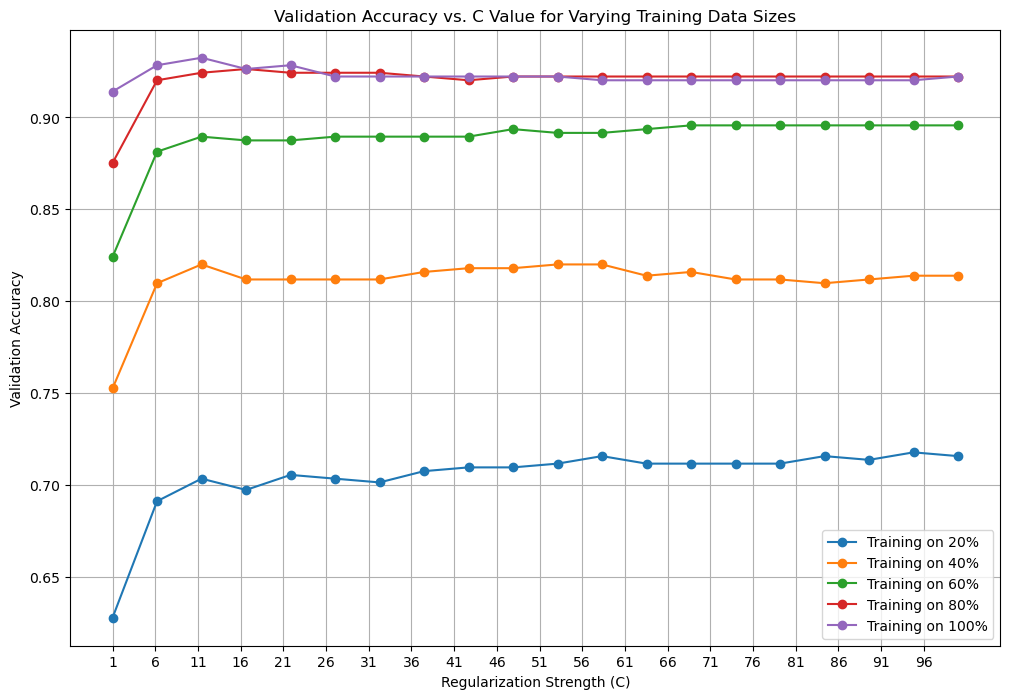

In [27]:

# Assuming dftrain and dfvalid are already defined
# Features and labels for validation set
X_valid = dfvalid.iloc[:, :-1].reindex(columns=dftrain.columns[:-1])  # Align columns with train set
y_valid = dfvalid.iloc[:, -1]

# One-Hot Encoder (fit only on full training data)
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(dftrain.iloc[:, :-1])

# Percentages of the dataset to be used
percentages = [20, 40, 60, 80, 100]
c_values = np.linspace(1, 100, num=20)  # 20 values of C from 1 to 100
accuracies = np.zeros((len(percentages), len(c_values)))  # To store accuracy for each percentage and C

# Loop over each percentage
for i, pct in enumerate(percentages):
    # Subset the training data to the required percentage
    sample_size = int((pct / 100) * len(dftrain))
    dftrain_sample = dftrain.sample(n=sample_size, random_state=42)

    X_train_sample = dftrain_sample.iloc[:, :-1]
    y_train_sample = dftrain_sample.iloc[:, -1]
    
    # One-hot encode the training sample
    X_train_sample_encoded = encoder.transform(X_train_sample)
    X_valid_encoded = encoder.transform(X_valid)  # Validation set remains the same
    
    # Loop over each C value
    for j, c in enumerate(c_values):
        # Train the model with L1 regularization
        model = LogisticRegression(penalty='l1', C=c, solver='liblinear')  # L1 regularization
        model.fit(X_train_sample_encoded, y_train_sample)
        
        # Validate the model on the full validation set
        y_valid_pred = model.predict(X_valid_encoded)
        valid_accuracy = accuracy_score(y_valid, y_valid_pred)
        accuracies[i, j] = valid_accuracy

        print(f"Training on {pct}% of the data, C={c:.2f} - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Plotting the results
plt.figure(figsize=(12, 8))
for i, pct in enumerate(percentages):
    plt.plot(c_values, accuracies[i, :], marker='o', label=f'Training on {pct}%')

plt.title("Validation Accuracy vs. C Value for Varying Training Data Sizes")
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Validation Accuracy")
plt.xticks(np.arange(1, 101, 5))
plt.grid()
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming dftrain and dfvalid are already defined
# Features and labels for training and validation
X_train = dftrain.iloc[:, :-1]  # All columns except the last one (features)
y_train = dftrain.iloc[:, -1]   # Last column (binary label)

X_valid = dfvalid.iloc[:, :-1].reindex(columns=X_train.columns)  # Align columns with training set
y_valid = dfvalid.iloc[:, -1]

# One-Hot Encoding for emojis
encoder = OneHotEncoder(sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)
X_valid_encoded = encoder.transform(X_valid)

# Standardization after One-Hot Encoding
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_valid_scaled = scaler.transform(X_valid_encoded)

# Split the training data into smaller subsets (20%, 40%, 60%, 80%, 100%)
percentages = [20, 40, 60, 80, 100]
accuracies = []

for pct in percentages:
    # Subset the training data to the required percentage
    sample_size = int((pct / 100) * len(X_train_scaled))
    X_train_sample = X_train_scaled[:sample_size]
    y_train_sample = y_train[:sample_size]
    
    # Hyperparameter tuning using GridSearchCV
    param_grid = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf'],
        'gamma': ['scale', 'auto'],
    }
    
    model = SVC()
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_sample, y_train_sample)
    
    best_model = grid_search.best_estimator_
    
    # Evaluate the best model on the validation set
    y_valid_pred = best_model.predict(X_valid_scaled)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy)
    
    print(f"Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Plot the accuracy for each percentage
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Training Data Size (SVM with RBF Kernel)")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()

# Display the best parameters for 40% dataset
best_accuracy_40pct = accuracies[percentages.index(40)]
print(f"Best accuracy for 40% of data: {best_accuracy_40pct * 100:.2f}%")

Training on 20% of the data - Validation Accuracy: 51.33%
Training on 40% of the data - Validation Accuracy: 58.49%
Training on 60% of the data - Validation Accuracy: 64.42%
Training on 80% of the data - Validation Accuracy: 70.96%
Training on 100% of the data - Validation Accuracy: 75.87%


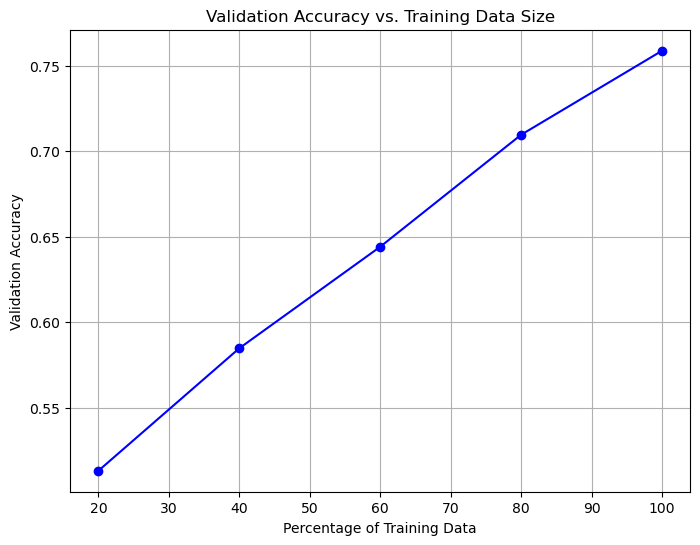

In [7]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Assuming dftrain and dfvalid are already defined
X_valid = dfvalid.iloc[:, :-1].reindex(columns=dftrain.columns[:-1])  # Align columns with train set
y_valid = dfvalid.iloc[:, -1]

# One-Hot Encoder (fit only on full training data)
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(dftrain.iloc[:, :-1])

# Percentages of the dataset to be used
percentages = [20, 40, 60, 80, 100]
accuracies = []

# Loop over each percentage
for pct in percentages:
    # Subset the training data to the required percentage
    sample_size = int((pct / 100) * len(dftrain))
    dftrain_sample = dftrain.sample(n=sample_size, random_state=42)

    X_train_sample = dftrain_sample.iloc[:, :-1]
    y_train_sample = dftrain_sample.iloc[:, -1]
    
    # One-hot encode the training sample
    X_train_sample_encoded = encoder.transform(X_train_sample)
    X_valid_encoded = encoder.transform(X_valid)  # Validation set remains the same
    
    # Train the SVM model with RBF kernel
    model = SVC(kernel='rbf', C=1.0)  # You can tune C and other parameters
    model.fit(X_train_sample_encoded, y_train_sample)
    
    # Validate the model on the full validation set
    y_valid_pred = model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy)
    
    print(f"Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Training Data Size")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.grid(True)
plt.show()

n_neighbors = 1: Validation Accuracy = 52.05%
n_neighbors = 3: Validation Accuracy = 55.72%
n_neighbors = 5: Validation Accuracy = 61.51%
n_neighbors = 7: Validation Accuracy = 63.70%
n_neighbors = 9: Validation Accuracy = 67.09%
n_neighbors = 11: Validation Accuracy = 70.90%
n_neighbors = 13: Validation Accuracy = 74.08%
n_neighbors = 15: Validation Accuracy = 75.07%
n_neighbors = 17: Validation Accuracy = 77.47%
n_neighbors = 19: Validation Accuracy = 78.60%
n_neighbors = 21: Validation Accuracy = 79.31%
n_neighbors = 23: Validation Accuracy = 79.80%
n_neighbors = 25: Validation Accuracy = 80.01%
n_neighbors = 27: Validation Accuracy = 79.24%
n_neighbors = 29: Validation Accuracy = 80.58%
n_neighbors = 31: Validation Accuracy = 80.16%
n_neighbors = 33: Validation Accuracy = 80.08%
n_neighbors = 35: Validation Accuracy = 80.16%
n_neighbors = 37: Validation Accuracy = 81.21%
n_neighbors = 39: Validation Accuracy = 80.86%
n_neighbors = 41: Validation Accuracy = 79.87%
n_neighbors = 43: 

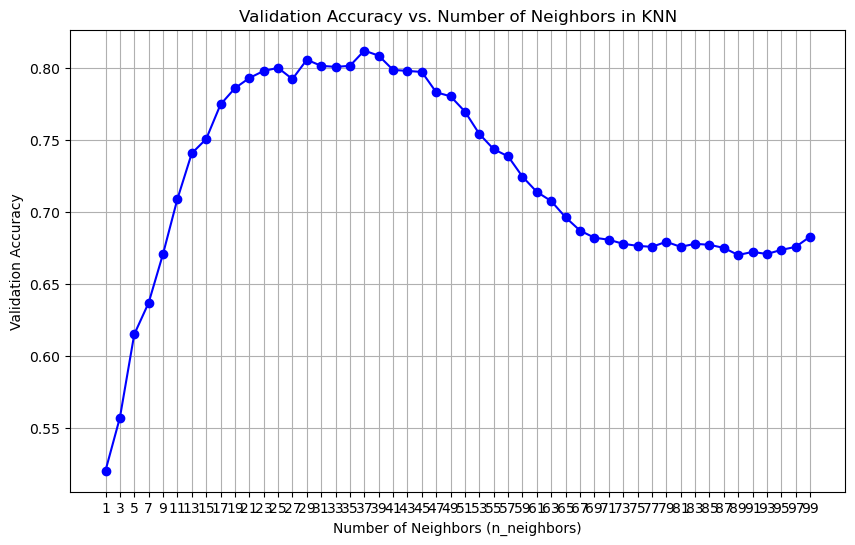

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Sample DataFrame creation (Replace this with your actual DataFrame)
# dftrain = pd.read_csv('your_data.csv')  # Load your dataset

# Assuming dftrain is your DataFrame containing features and labels
X = dftrain.iloc[:, :-1]  # Features
y = dftrain.iloc[:, -1]   # Labels (last column)

# One-Hot Encoding for emoji features
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X)

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Splitting the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Prepare to store accuracies
n_neighbors = list(range(1, 100, 2))  # Odd values from 1 to 99
accuracies = []

# Loop through each odd value of n_neighbors
for n in n_neighbors:
    # Create and train the KNN model
    knn_model = KNeighborsClassifier(n_neighbors=n)
    knn_model.fit(X_train, y_train)
    
    # Validate the model
    y_valid_pred = knn_model.predict(X_valid)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy)

    print(f"n_neighbors = {n}: Validation Accuracy = {valid_accuracy * 100:.2f}%")

# Plotting the validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(n_neighbors, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Number of Neighbors in KNN")
plt.xlabel("Number of Neighbors (n_neighbors)")
plt.ylabel("Validation Accuracy")
plt.xticks(n_neighbors)  # Show all odd numbers as ticks
plt.grid(True)
plt.show()

In [35]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming dftrain and dfvalid are already defined
# Features and labels for training and validation
X_train = dftrain.iloc[:, :-1]  # All columns except the last one (features)
y_train = dftrain.iloc[:, -1]   # Last column (binary label)

X_valid = dfvalid.iloc[:, :-1].reindex(columns=X_train.columns)  # Align columns with training set
y_valid = dfvalid.iloc[:, -1]

# One-Hot Encoding for emojis
encoder = OneHotEncoder(sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)
X_valid_encoded = encoder.transform(X_valid)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_valid_scaled = scaler.transform(X_valid_encoded)

# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)  # You can adjust this value
X_train_pca = pca.fit_transform(X_train_scaled)
X_valid_pca = pca.transform(X_valid_scaled)

# Print the shape of the transformed datasets
print(f"Original shape: {X_train_scaled.shape}")
print(f"Transformed shape: {X_train_pca.shape}")

# Train KNN model with PCA-transformed data
knn_model = KNeighborsClassifier(n_neighbors=5)  # Set n_neighbors to 5
knn_model.fit(X_train_pca, y_train)

# Validate the model
y_valid_pred = knn_model.predict(X_valid_pca)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy with PCA: {valid_accuracy * 100:.2f}%")

Original shape: (7080, 2159)
Transformed shape: (7080, 1848)
Validation Accuracy with PCA: 59.51%


Training on 20% of the data - Validation Accuracy: 53.78%
Training on 40% of the data - Validation Accuracy: 63.80%
Training on 60% of the data - Validation Accuracy: 74.44%
Training on 80% of the data - Validation Accuracy: 80.57%
Training on 100% of the data - Validation Accuracy: 76.28%


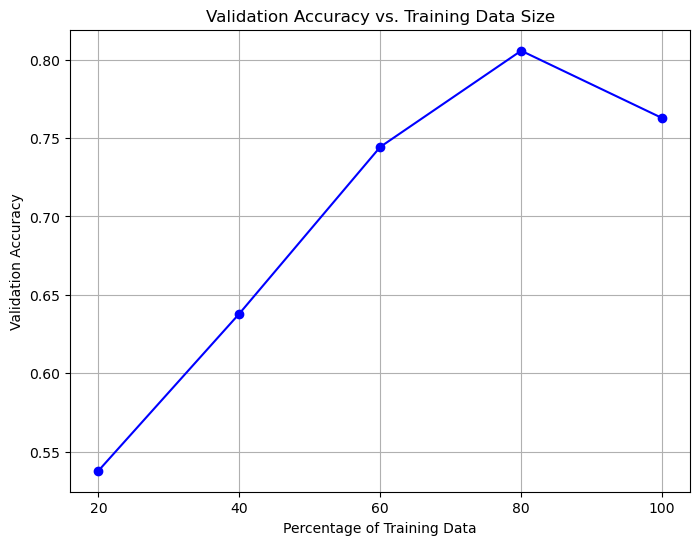

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Assuming dftrain and dfvalid are already defined
# Features and labels for training and validation
X_train = dftrain.iloc[:, :-1]  # All columns except the last one (features)
y_train = dftrain.iloc[:, -1]    # Last column (binary label)

X_valid = dfvalid.iloc[:, :-1].reindex(columns=X_train.columns)  # Align columns with training set
y_valid = dfvalid.iloc[:, -1]

# One-Hot Encoding for emojis
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(X_train)

# Percentages of the dataset to be used
percentages = [20, 40, 60, 80, 100]
accuracies = []

# Loop over each percentage
for pct in percentages:
    # Subset the training data to the required percentage
    sample_size = int((pct / 100) * len(dftrain))
    dftrain_sample = dftrain.sample(n=sample_size, random_state=42)

    X_train_sample = dftrain_sample.iloc[:, :-1]
    y_train_sample = dftrain_sample.iloc[:, -1]

    # One-hot encode the training sample
    X_train_sample_encoded = encoder.transform(X_train_sample)

    # Train Decision Tree model
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train_sample_encoded, y_train_sample)

    # Validate the model
    X_valid_encoded = encoder.transform(X_valid)
    y_valid_pred = dt_model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy)

    print(f"Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Training Data Size")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy")
plt.xticks(percentages)
plt.grid(True)
plt.show()

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_valid, and y_valid are already defined
# One-hot encode features
encoder = OneHotEncoder(sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train)
X_valid_encoded = encoder.transform(X_valid)

# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_model, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train_encoded, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_dt_model = grid_search.best_estimator_

# Evaluate on the validation set
y_valid_pred = best_dt_model.predict(X_valid_encoded)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy with tuned parameters: {valid_accuracy * 100:.2f}%")

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 20}
Validation Accuracy with tuned parameters: 79.14%


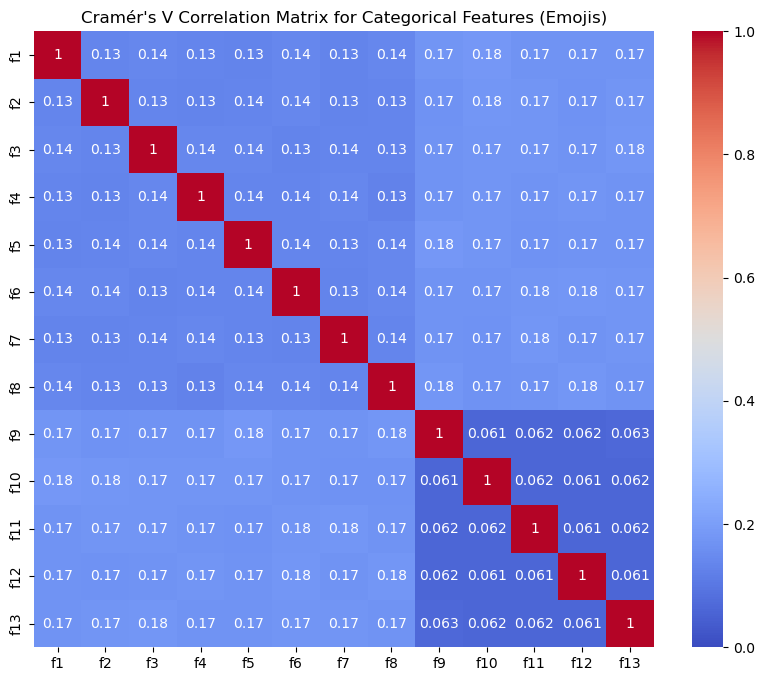

In [11]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

# Function to compute Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k, r) - 1)))

# Create an empty correlation matrix
n_features = dftrain.shape[1] - 1  # 13 features
cramers_matrix = np.zeros((n_features, n_features))

# Compute Cramér's V for each pair of features
for i in range(n_features):
    for j in range(n_features):
        cramers_matrix[i, j] = cramers_v(dftrain.iloc[:, i], dftrain.iloc[:, j])

# Create a heatmap to visualize the Cramér's V correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, 
            xticklabels=dftrain.columns[:-1], yticklabels=dftrain.columns[:-1])
plt.title("Cramér's V Correlation Matrix for Categorical Features (Emojis)")
plt.show()

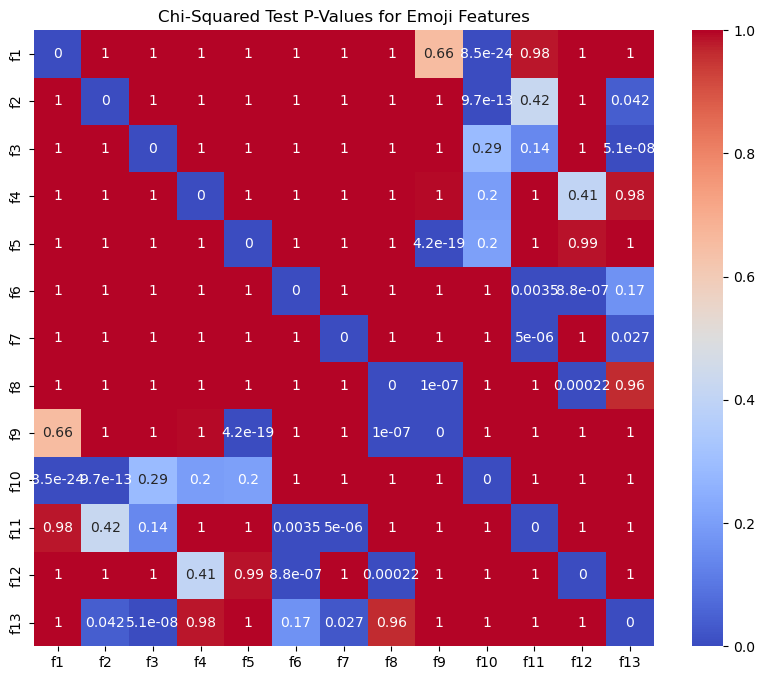

In [12]:
from scipy.stats import chi2_contingency

def chi2_test(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    return p  # p-value to see if independent or dependent

# Compute pairwise p-values for chi-squared test
chi2_matrix = np.zeros((n_features, n_features))

for i in range(n_features):
    for j in range(n_features):
        chi2_matrix[i, j] = chi2_test(dftrain.iloc[:, i], dftrain.iloc[:, j])

# Visualize the p-values (lower values indicate higher dependence)
plt.figure(figsize=(10, 8))
sns.heatmap(chi2_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1, 
            xticklabels=dftrain.columns[:-1], yticklabels=dftrain.columns[:-1])
plt.title("Chi-Squared Test P-Values for Emoji Features")
plt.show()

In [13]:
import pandas as pd
from scipy.stats import chi2_contingency
import itertools

# Assuming dftrain is your training dataset with 13 emoji features
emoji_features = dftrain.columns[:-1]  # Selecting only the emoji features (assume last column is the label)

# Function to perform Chi-Squared Test for two categorical features
def chi_squared_test(df, feature1, feature2):
    contingency_table = pd.crosstab(df[feature1], df[feature2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Perform the test for each pair of emoji features
results = []
for feature1, feature2 in itertools.combinations(emoji_features, 2):
    chi2_stat, p_value = chi_squared_test(dftrain, feature1, feature2)
    results.append((feature1, feature2, chi2_stat, p_value))

# Display the results
for feature1, feature2, chi2_stat, p_value in results:
    print(f"Chi-Squared Test between {feature1} and {feature2}:")
    print(f"  Chi-Squared Statistic: {chi2_stat}")
    print(f"  P-value: {p_value}")
    if p_value < 0.05:
        print(f"  Result: Dependent (Reject Null Hypothesis)\n")
    else:
        print(f"  Result: Independent (Fail to Reject Null Hypothesis)\n")

Chi-Squared Test between f1 and f2:
  Chi-Squared Statistic: 27010.23627102541
  P-value: 1.0
  Result: Independent (Fail to Reject Null Hypothesis)

Chi-Squared Test between f1 and f3:
  Chi-Squared Statistic: 28466.946672104274
  P-value: 1.0
  Result: Independent (Fail to Reject Null Hypothesis)

Chi-Squared Test between f1 and f4:
  Chi-Squared Statistic: 26855.352625813408
  P-value: 1.0
  Result: Independent (Fail to Reject Null Hypothesis)

Chi-Squared Test between f1 and f5:
  Chi-Squared Statistic: 26428.967392306306
  P-value: 1.0
  Result: Independent (Fail to Reject Null Hypothesis)

Chi-Squared Test between f1 and f6:
  Chi-Squared Statistic: 28813.409533023136
  P-value: 1.0
  Result: Independent (Fail to Reject Null Hypothesis)

Chi-Squared Test between f1 and f7:
  Chi-Squared Statistic: 26001.43019958218
  P-value: 1.0
  Result: Independent (Fail to Reject Null Hypothesis)

Chi-Squared Test between f1 and f8:
  Chi-Squared Statistic: 28388.68708072847
  P-value: 1.0
  

In [14]:
import pandas as pd
from scipy.stats import chi2_contingency
import itertools

# Assuming dftrain is your training dataset with 13 emoji features
emoji_features = dftrain.columns[:-1]  # Selecting only the emoji features (assume last column is the label)

# Function to perform Chi-Squared Test for two categorical features
def chi_squared_test(df, feature1, feature2):
    contingency_table = pd.crosstab(df[feature1], df[feature2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return chi2, p

# Perform the test for each pair of emoji features
correlated_pairs = []  # To store correlated feature pairs
for feature1, feature2 in itertools.combinations(emoji_features, 2):
    chi2_stat, p_value = chi_squared_test(dftrain, feature1, feature2)
    if p_value < 0.05:  # If p-value is less than 0.05, the variables are correlated
        correlated_pairs.append((feature1, feature2, chi2_stat, p_value))

# Display correlated features
if correlated_pairs:
    print("Correlated Features (Chi-Squared Test Results):")
    for feature1, feature2, chi2_stat, p_value in correlated_pairs:
        print(f" - {feature1} and {feature2} are correlated:")
        print(f"   Chi-Squared Statistic: {chi2_stat:.4f}")
        print(f"   P-value: {p_value:.4f}")
        print(f"   Result: Dependent (Reject Null Hypothesis)")
else:
    print("No correlated features found.")

Correlated Features (Chi-Squared Test Results):
 - f1 and f10 are correlated:
   Chi-Squared Statistic: 21097.7705
   P-value: 0.0000
   Result: Dependent (Reject Null Hypothesis)
 - f2 and f10 are correlated:
   Chi-Squared Statistic: 20487.5051
   P-value: 0.0000
   Result: Dependent (Reject Null Hypothesis)
 - f2 and f13 are correlated:
   Chi-Squared Statistic: 19419.8267
   P-value: 0.0416
   Result: Dependent (Reject Null Hypothesis)
 - f3 and f13 are correlated:
   Chi-Squared Statistic: 20138.2308
   P-value: 0.0000
   Result: Dependent (Reject Null Hypothesis)
 - f5 and f9 are correlated:
   Chi-Squared Statistic: 20861.8495
   P-value: 0.0000
   Result: Dependent (Reject Null Hypothesis)
 - f6 and f11 are correlated:
   Chi-Squared Statistic: 19610.9185
   P-value: 0.0035
   Result: Dependent (Reject Null Hypothesis)
 - f6 and f12 are correlated:
   Chi-Squared Statistic: 20028.1262
   P-value: 0.0000
   Result: Dependent (Reject Null Hypothesis)
 - f7 and f11 are correlated:

Training on 20% of the data - Validation Accuracy: 60.53%
Training on 40% of the data - Validation Accuracy: 66.87%
Training on 60% of the data - Validation Accuracy: 65.64%
Training on 80% of the data - Validation Accuracy: 67.28%
Training on 100% of the data - Validation Accuracy: 71.78%


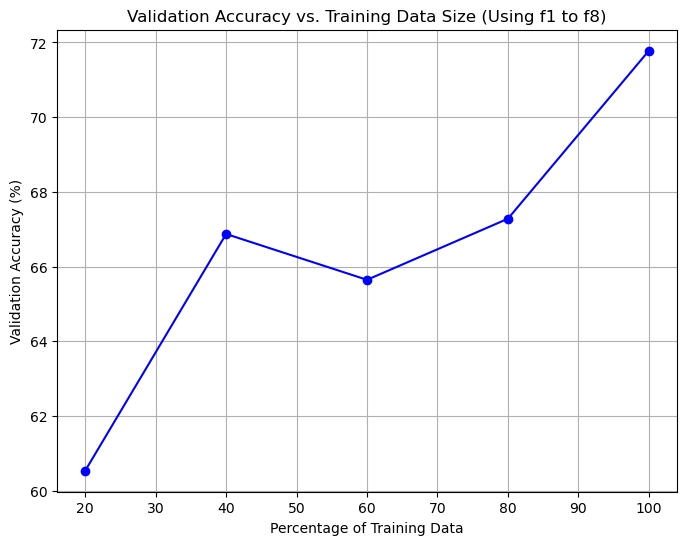

In [34]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming dftrain and dfvalid are already defined
# Features and labels for training and validation (taking only first 8 features)
X_train = dftrain.iloc[:, :8]  # First 8 features
y_train = dftrain.iloc[:, -1]   # Last column (binary label)

X_valid = dfvalid.iloc[:, :8].reindex(columns=X_train.columns)  # Align columns with training set
y_valid = dfvalid.iloc[:, -1]

# Percentages of the dataset to be used
percentages = [20, 40, 60, 80, 100]
accuracies = []

# Loop over each percentage
for pct in percentages:
    # Subset the training data to the required percentage
    sample_size = int((pct / 100) * len(dftrain))
    dftrain_sample = dftrain.sample(n=sample_size, random_state=42)

    X_train_sample = dftrain_sample.iloc[:, :8]  # Use only the first 8 features
    y_train_sample = dftrain_sample.iloc[:, -1]

    # One-Hot Encoding for emojis (fitting on the full training sample)
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Ignore unknown categories during transform
    X_train_sample_encoded = encoder.fit_transform(X_train_sample)
    X_valid_encoded = encoder.transform(X_valid)  # Transform validation set with the same encoder
    
    # Train the model with L2 regularization (Ridge)
    model = LogisticRegression(penalty='l2', C=1, solver='liblinear')
    model.fit(X_train_sample_encoded, y_train_sample)
    
    # Validate the model on the validation set
    y_valid_pred = model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy * 100)  # Store accuracy in percentage
    
    print(f"Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Training Data Size (Using f1 to f8)")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy (%)")
plt.grid(True)
plt.show()

Training on 20% of the data - Validation Accuracy: 68.92%
Training on 40% of the data - Validation Accuracy: 70.96%
Training on 60% of the data - Validation Accuracy: 73.62%
Training on 80% of the data - Validation Accuracy: 73.62%
Training on 100% of the data - Validation Accuracy: 74.44%


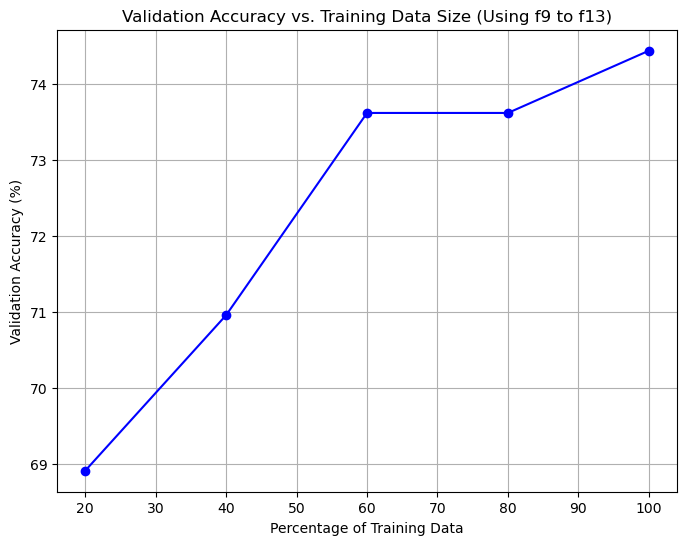

In [44]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming dftrain and dfvalid are already defined
# Features and labels for training and validation (taking features f9 to f13)
X_train = dftrain.iloc[:, 8:13]  # Features f9 to f13
y_train = dftrain.iloc[:, -1]     # Last column (binary label)

X_valid = dfvalid.iloc[:, 8:13].reindex(columns=X_train.columns)  # Align columns with training set
y_valid = dfvalid.iloc[:, -1]

# Percentages of the dataset to be used
percentages = [20, 40, 60, 80, 100]
accuracies = []

# Loop over each percentage
for pct in percentages:
    # Subset the training data to the required percentage
    sample_size = int((pct / 100) * len(dftrain))
    dftrain_sample = dftrain.sample(n=sample_size, random_state=42)

    X_train_sample = dftrain_sample.iloc[:, 8:13]  # Use only features f9 to f13
    y_train_sample = dftrain_sample.iloc[:, -1]

    # One-Hot Encoding for emojis (fitting on the full training sample)
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Ignore unknown categories during transform
    X_train_sample_encoded = encoder.fit_transform(X_train_sample)
    X_valid_encoded = encoder.transform(X_valid)  # Transform validation set with the same encoder
    
    # Train the model with L2 regularization (Ridge)
    model = LogisticRegression(penalty='l1', C=10, solver='liblinear')
    model.fit(X_train_sample_encoded, y_train_sample)
    
    # Validate the model on the validation set
    y_valid_pred = model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy * 100)  # Store accuracy in percentage
    
    print(f"Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Training Data Size (Using f9 to f13)")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy (%)")
plt.grid(True)
plt.show()

Training on 20% of the data - Validation Accuracy: 66.46%
Training on 40% of the data - Validation Accuracy: 70.96%
Training on 60% of the data - Validation Accuracy: 72.39%
Training on 80% of the data - Validation Accuracy: 75.46%
Training on 100% of the data - Validation Accuracy: 74.64%


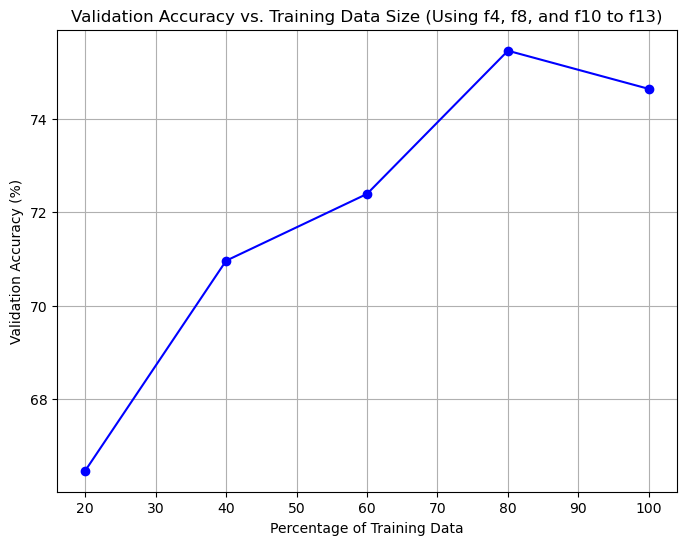

In [45]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

# Assuming dftrain and dfvalid are already defined
# Features and labels for training and validation (taking specific features)
X_train = dftrain.iloc[:, [3, 7, 9, 10, 11, 12]]  # f4, f8, f10 to f13
y_train = dftrain.iloc[:, -1]   # Last column (binary label)

X_valid = dfvalid.iloc[:, [3, 7, 9, 10, 11, 12]].reindex(columns=X_train.columns)  # Align columns with training set
y_valid = dfvalid.iloc[:, -1]

# Percentages of the dataset to be used
percentages = [20, 40, 60, 80, 100]
accuracies = []

# Loop over each percentage
for pct in percentages:
    # Subset the training data to the required percentage
    sample_size = int((pct / 100) * len(dftrain))
    dftrain_sample = dftrain.sample(n=sample_size, random_state=42)

    X_train_sample = dftrain_sample.iloc[:, [3, 7, 9, 10, 11, 12]]  # Use specified features
    y_train_sample = dftrain_sample.iloc[:, -1]

    # One-Hot Encoding for emojis (fitting on the full training sample)
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Ignore unknown categories during transform
    X_train_sample_encoded = encoder.fit_transform(X_train_sample)
    X_valid_encoded = encoder.transform(X_valid)  # Transform validation set with the same encoder
    
    # Train the model with L2 regularization (Ridge)
    model = LogisticRegression(penalty='l1', C=10, solver='liblinear')
    model.fit(X_train_sample_encoded, y_train_sample)
    
    # Validate the model on the validation set
    y_valid_pred = model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy * 100)  # Store accuracy in percentage
    
    print(f"Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Training Data Size (Using f4, f8, and f10 to f13)")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy (%)")
plt.grid(True)
plt.show()

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

# Assuming dftrain and dfvalid are already defined
# Features and labels for training and validation
X_train = dftrain.iloc[:, :-1]  # All columns except the last one (features)
y_train = dftrain.iloc[:, -1]    # Last column (binary label)

X_valid = dfvalid.iloc[:, :-1].reindex(columns=X_train.columns)  # Align columns with training set
y_valid = dfvalid.iloc[:, -1]

# One-Hot Encoding for emojis (fitting on training data and applying to all sets)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_valid_encoded = encoder.transform(X_valid)

# Train a Logistic Regression model to determine feature importance
model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')  # L2 for initial training
model.fit(X_train_encoded, y_train)

# Select features based on the importance
selector = SelectFromModel(model, threshold='mean', prefit=True)
X_train_selected = selector.transform(X_train_encoded)
X_valid_selected = selector.transform(X_valid_encoded)

# Check if any features were selected
if X_train_selected.shape[1] == 0:
    raise ValueError("No features selected by the feature selector.")

# Train a new Logistic Regression model using selected features
model_l0 = LogisticRegression(penalty='l1', C=11, solver='liblinear')  # L1 regularization
model_l0.fit(X_train_selected, y_train)

# Validate the model on the validation set
y_valid_pred = model_l0.predict(X_valid_selected)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)

# Print the validation accuracy
print(f"Validation Accuracy using selected features: {valid_accuracy * 100:.2f}%")

# Get the weight vector of the L1 model
weights = model_l0.coef_[0]

# Get selected feature names
feature_names = encoder.get_feature_names_out()
selected_feature_names = feature_names[selector.get_support()]

# Create a DataFrame for easy plotting
weight_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Weight': weights[selector.get_support()]
})

# Visualize the weights
plt.figure(figsize=(12, 6))
plt.barh(weight_df['Feature'], weight_df['Weight'], color='blue')
plt.xlabel('Weight')
plt.title('Weight Vector for Logistic Regression with Selected Features (L1 Loss)')
plt.axvline(0, color='red', linestyle='--')  # Line at zero for reference
plt.show()

# Display the weight values
print(weight_df.sort_values(by='Weight', ascending=False))

Validation Accuracy using selected features: 89.16%


IndexError: boolean index did not match indexed array along dimension 0; dimension is 796 but corresponding boolean dimension is 2159

Epoch 1/20


/Users/adityagautam/anaconda3/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5488 - loss: 1.3690 - val_accuracy: 0.8221 - val_loss: 0.4206
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8842 - loss: 0.3021 - val_accuracy: 0.8466 - val_loss: 0.3541
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9818 - loss: 0.0922 - val_accuracy: 0.8630 - val_loss: 0.3695
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9960 - loss: 0.0387 - val_accuracy: 0.8875 - val_loss: 0.3456
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9990 - loss: 0.0188 - val_accuracy: 0.8896 - val_loss: 0.3263
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 0.8855 - val_loss: 0.3046
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0053 - val_accuracy: 0.8916 - val_loss: 0.2966
Epoch 8/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 0.8855 - val_

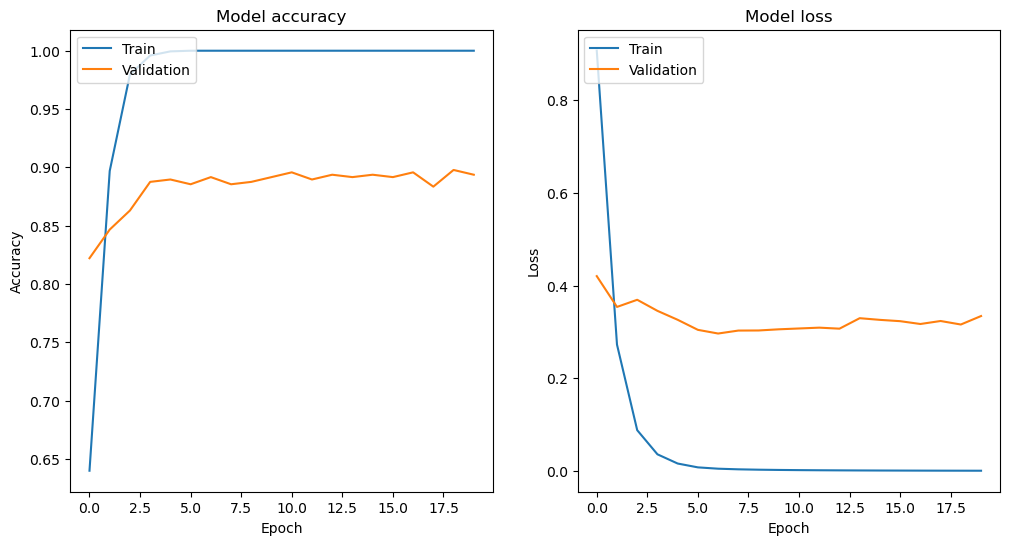

In [68]:

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from tensorflow.keras.regularizers import l2

# Assuming dftrain and dfvalid are already defined
# Features and labels for training and validation
X_train = dftrain.iloc[:, :-1]  # All columns except the last one (features)
y_train = dftrain.iloc[:, -1]    # Last column (binary label)

X_valid = dfvalid.iloc[:, :-1].reindex(columns=X_train.columns)  # Align columns with training set
y_valid = dfvalid.iloc[:, -1]

# One-Hot Encoding for emojis (fitting on training data and applying to all sets)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_valid_encoded = encoder.transform(X_valid)

# Build the neural network model
model = Sequential()

model.add(Dense(256, input_dim=X_train_encoded.shape[1], activation='relu'))  # Input layer
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_encoded, y_train, validation_data=(X_valid_encoded, y_valid), epochs=20, batch_size=32)

# Evaluate the model on the validation dataset
y_valid_pred = (model.predict(X_valid_encoded) > 0.5).astype("int32")
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Plotting training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

Training on 20% of the data - Validation Accuracy: 56.65%
Training on 40% of the data - Validation Accuracy: 67.08%
Training on 60% of the data - Validation Accuracy: 76.89%
Training on 80% of the data - Validation Accuracy: 82.82%
Training on 100% of the data - Validation Accuracy: 86.30%


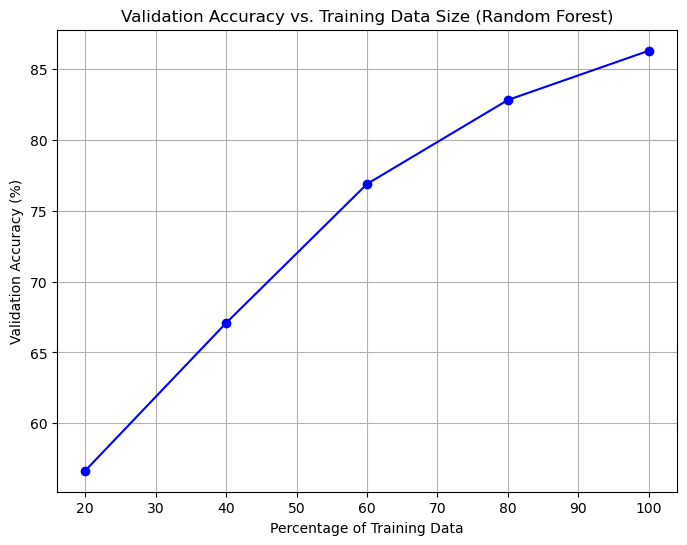

In [77]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Assuming dftrain and dfvalid are already defined
# Features and labels for training and validation
X_train = dftrain.iloc[:, :-1]  # All columns except the last one (features)
y_train = dftrain.iloc[:, -1]   # Last column (binary label)

X_valid = dfvalid.iloc[:, :-1].reindex(columns=X_train.columns)  # Align columns with training set
y_valid = dfvalid.iloc[:, -1]

# One-Hot Encoding for emojis (fitting on training data and applying to all sets)
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # Ignore unknown categories during transform
X_train_encoded = encoder.fit_transform(X_train)
X_valid_encoded = encoder.transform(X_valid)

# Percentages of the dataset to be used
percentages = [20, 40, 60, 80, 100]
accuracies = []

# Loop over each percentage
for pct in percentages:
    # Subset the training data to the required percentage
    sample_size = int((pct / 100) * len(dftrain))
    dftrain_sample = dftrain.sample(n=sample_size, random_state=42)

    X_train_sample = dftrain_sample.iloc[:, :-1]  # Features
    y_train_sample = dftrain_sample.iloc[:, -1]    # Labels
    
    # One-hot encode the training sample
    X_train_sample_encoded = encoder.transform(X_train_sample)
    
    # Train the Random Forest model
    model = RandomForestClassifier( random_state=42, min_samples_split= 5, n_estimators= 200,max_depth= None)
    model.fit(X_train_sample_encoded, y_train_sample)
    
    # Validate the model on the validation set
    y_valid_pred = model.predict(X_valid_encoded)
    valid_accuracy = accuracy_score(y_valid, y_valid_pred)
    accuracies.append(valid_accuracy * 100)  # Store accuracy in percentage
    
    print(f"Training on {pct}% of the data - Validation Accuracy: {valid_accuracy * 100:.2f}%")

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(percentages, accuracies, marker='o', linestyle='-', color='b')
plt.title("Validation Accuracy vs. Training Data Size (Random Forest)")
plt.xlabel("Percentage of Training Data")
plt.ylabel("Validation Accuracy (%)")
plt.grid(True)
plt.show()

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Assuming X_train_encoded and y_train are already defined

# Define the model
rf = RandomForestClassifier(random_state=42)

# Specify the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_encoded, y_train)

# Output the best parameters and best score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-validation Score: 0.8021186440677965
